# Metabolic Syndrome

### Table of content:

1. Business Understanding
2. Data understanding and Data cleaning:

    Checking missing values

    Checking miscoded values in both categorical and numeric variables

    Remove missing values
    
3. Data exploration:

    3.1 Numeric variables:

    Checking distribution and outliers

    Checking correlation among numeric variables

    Convert all categorical variables into dummies and check the correlation among variables

    3.2 Categorical variables:

    Checking distribution, value counts

4. Feature Engineering:

    Lasso Regression

    Chi-square

5. Data preparation:

    Correct skewness using log10 transformation

    Remove the old skewed variables

    Remove all unchosen variables

    Using 1.5*IQR to remove outliers

    Scaling using MinMaxScaler

6. Model training:

    6.1 KNN model

    6.2 Logistic Regression

    6.3 Support Vector Classifier

    6.4 Decision Tree
    
7. Model assessment and comparison
8. Model testing with new data

## 1. Business Understanding

The goal of this analysis is to identify which factors are most significant in predicting if a person has metabolic syndrome or not. From there we will develop a model to predict the presence of this syndrome.

This dataset contains information on individuals with metabolic syndrome, a complex medical condition associated with a cluster of risk factors for cardiovascular diseases and type 2 diabetes. The data includes demographic, clinical, and laboratory measurements, as well as the presence or absence of metabolic syndrome.

https://www.kaggle.com/datasets/antimoni/metabolic-syndrome/data

Column Descriptors:

seqn: Sequential identification number.

Age: Age of the individual.

Sex: Gender of the individual (e.g., Male, Female).

Marital: Marital status of the individual.

Income: Income level or income-related information.

Race: Ethnic or racial background of the individual.

WaistCirc: Waist circumference measurement.

BMI: Body Mass Index, a measure of body composition.

Albuminuria: Measurement related to albumin in urine.

UrAlbCr: Urinary albumin-to-creatinine ratio.

UricAcid: Uric acid levels in the blood.

BloodGlucose: Blood glucose levels, an indicator of diabetes risk.

HDL: High-Density Lipoprotein cholesterol levels (the "good" cholesterol).

Triglycerides: Triglyceride levels in the blood.

MetabolicSyndrome: Binary variable indicating the presence (1) or absence (0) of metabolic syndrome.

## 2. Data understanding and Data cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr,linregress,spearmanr,kendalltau

In [2]:
metabolic = pd.read_csv('Metabolic.csv')
metabolic.head()

seqn  Age     Sex  Marital  Income   Race  WaistCirc   BMI  Albuminuria  \
0  62161   22    Male   Single  8200.0  White       81.0  23.3            0   
1  62164   44  Female  Married  4500.0  White       80.1  23.2            0   
2  62169   21    Male   Single   800.0  Asian       69.6  20.1            0   
3  62172   43  Female   Single  2000.0  Black      120.4  33.3            0   
4  62177   51    Male  Married     NaN  Asian       81.1  20.1            0   

   UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  
0     3.88       4.9            92   41             84                  0  
1     8.55       4.5            82   28             56                  0  
2     5.07       5.4           107   43             78                  0  
3     5.22       5.0           104   73            141                  0  
4     8.13       5.0            95   43            126                  0

In [3]:
metabolic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [4]:
# dropping id column
metabolic.drop('seqn', axis=1, inplace=True)

In [5]:
# drop duplicate rows (if any)
metabolic.drop_duplicates()

Age     Sex  Marital  Income         Race  WaistCirc   BMI  Albuminuria  \
0      22    Male   Single  8200.0        White       81.0  23.3            0   
1      44  Female  Married  4500.0        White       80.1  23.2            0   
2      21    Male   Single   800.0        Asian       69.6  20.1            0   
3      43  Female   Single  2000.0        Black      120.4  33.3            0   
4      51    Male  Married     NaN        Asian       81.1  20.1            0   
...   ...     ...      ...     ...          ...        ...   ...          ...   
2396   48  Female  Married  1000.0        Other        NaN  59.7            0   
2397   30  Female   Single  2000.0        Asian        NaN  18.0            0   
2398   28    Male   Single   800.0  MexAmerican      100.8  29.4            0   
2399   27    Male  Married  8200.0  MexAmerican      106.6  31.3            0   
2400   60    Male   Single  6200.0        White      106.6  27.5            0   

      UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  
0        3.88       4.9            92   41             84                  0  
1        8.55       4.5            82   28             56                  0  
2        5.07       5.4           107   43             78                  0  
3        5.22       5.0           104   73            141                  0  
4        8.13       5.0            95   43            126                  0  
...       ...       ...           ...  ...            ...                ...  
2396    22.11       5.8           152   57            107                  0  
2397     2.90       7.9            91   90             91                  0  
2398     2.78       6.2            99   47             84                  0  
2399     4.15       6.2           100   41            124                  1  
2400    12.82       5.2            91   36            226                  1  

[2401 rows x 14 columns]

In [6]:
metabolic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2284 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2316 non-null   float64
 6   BMI                2375 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 262.7+ KB


<div class="alert alert-block alert-info">
<b></b> The dataset has 2401 rows and 14 columns after removing unnecessary column 'seqn'. Target variable is a binary column named MetabolicSyndrome. In input variables, there are 3 categorical variables and 10 numeric variables.
</div>

Checking missing values

In [7]:
metabolic.isnull().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

<div class="alert alert-block alert-info">
<b></b> The dataset has total 436 missing values, half of them is from Marital variables. Treating missing values will be done in the later part
</div>

Checking miscoded values in both categorical and numeric variables

In [8]:
# Print value counts of new variable with cycle for to include all items in 1 step
categorical_cols = metabolic.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(f"Value counts of {col} is:\n{metabolic[col].value_counts() }")
    print()

Value counts of Sex is:
Sex
Female    1211
Male      1190
Name: count, dtype: int64

Value counts of Marital is:
Marital
Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: count, dtype: int64

Value counts of Race is:
Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: count, dtype: int64



In [9]:
metabolic.describe()

Age       Income    WaistCirc          BMI  Albuminuria  \
count  2401.000000  2284.000000  2316.000000  2375.000000  2401.000000   
mean     48.691795  4005.253940    98.307254    28.702189     0.154102   
std      17.632852  2954.032186    16.252634     6.662242     0.422780   
min      20.000000   300.000000    56.200000    13.400000     0.000000   
25%      34.000000  1600.000000    86.675000    24.000000     0.000000   
50%      48.000000  2500.000000    97.000000    27.700000     0.000000   
75%      63.000000  6200.000000   107.625000    32.100000     0.000000   
max      80.000000  9000.000000   176.000000    68.700000     2.000000   

           UrAlbCr     UricAcid  BloodGlucose          HDL  Triglycerides  \
count  2401.000000  2401.000000   2401.000000  2401.000000    2401.000000   
mean     43.626131     5.489046    108.247813    53.369429     128.125364   
std     258.272829     1.439358     34.820657    15.185537      95.322477   
min       1.400000     1.800000     39.000000    14.000000      26.000000   
25%       4.450000     4.500000     92.000000    43.000000      75.000000   
50%       7.070000     5.400000     99.000000    51.000000     103.000000   
75%      13.690000     6.400000    110.000000    62.000000     150.000000   
max    5928.000000    11.300000    382.000000   156.000000    1562.000000   

       MetabolicSyndrome  
count        2401.000000  
mean            0.342357  
std             0.474597  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max             1.000000

<div class="alert alert-block alert-info">
<b></b> All variables look fine without miscoded or abnormal values.
</div>

remove missing values

In [10]:
# remove missing values
metabolic.dropna(inplace=True)

<div class="alert alert-block alert-info">
<b></b> Total rows with missing values is 392, half of which is from categorical variable Marital, we decided to just remove these rows, the remaining 2009 rows is still enough for prediction
</div>

In [11]:
metabolic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2009 non-null   int64  
 1   Sex                2009 non-null   object 
 2   Marital            2009 non-null   object 
 3   Income             2009 non-null   float64
 4   Race               2009 non-null   object 
 5   WaistCirc          2009 non-null   float64
 6   BMI                2009 non-null   float64
 7   Albuminuria        2009 non-null   int64  
 8   UrAlbCr            2009 non-null   float64
 9   UricAcid           2009 non-null   float64
 10  BloodGlucose       2009 non-null   int64  
 11  HDL                2009 non-null   int64  
 12  Triglycerides      2009 non-null   int64  
 13  MetabolicSyndrome  2009 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 235.4+ KB


## 3. Data exploration

### 3.1 Numeric variables

Checking distribution and outliers

In [12]:
# create a list of numeric variables only
numeric_cols = metabolic.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['Age',
 'Income',
 'WaistCirc',
 'BMI',
 'Albuminuria',
 'UrAlbCr',
 'UricAcid',
 'BloodGlucose',
 'HDL',
 'Triglycerides',
 'MetabolicSyndrome']

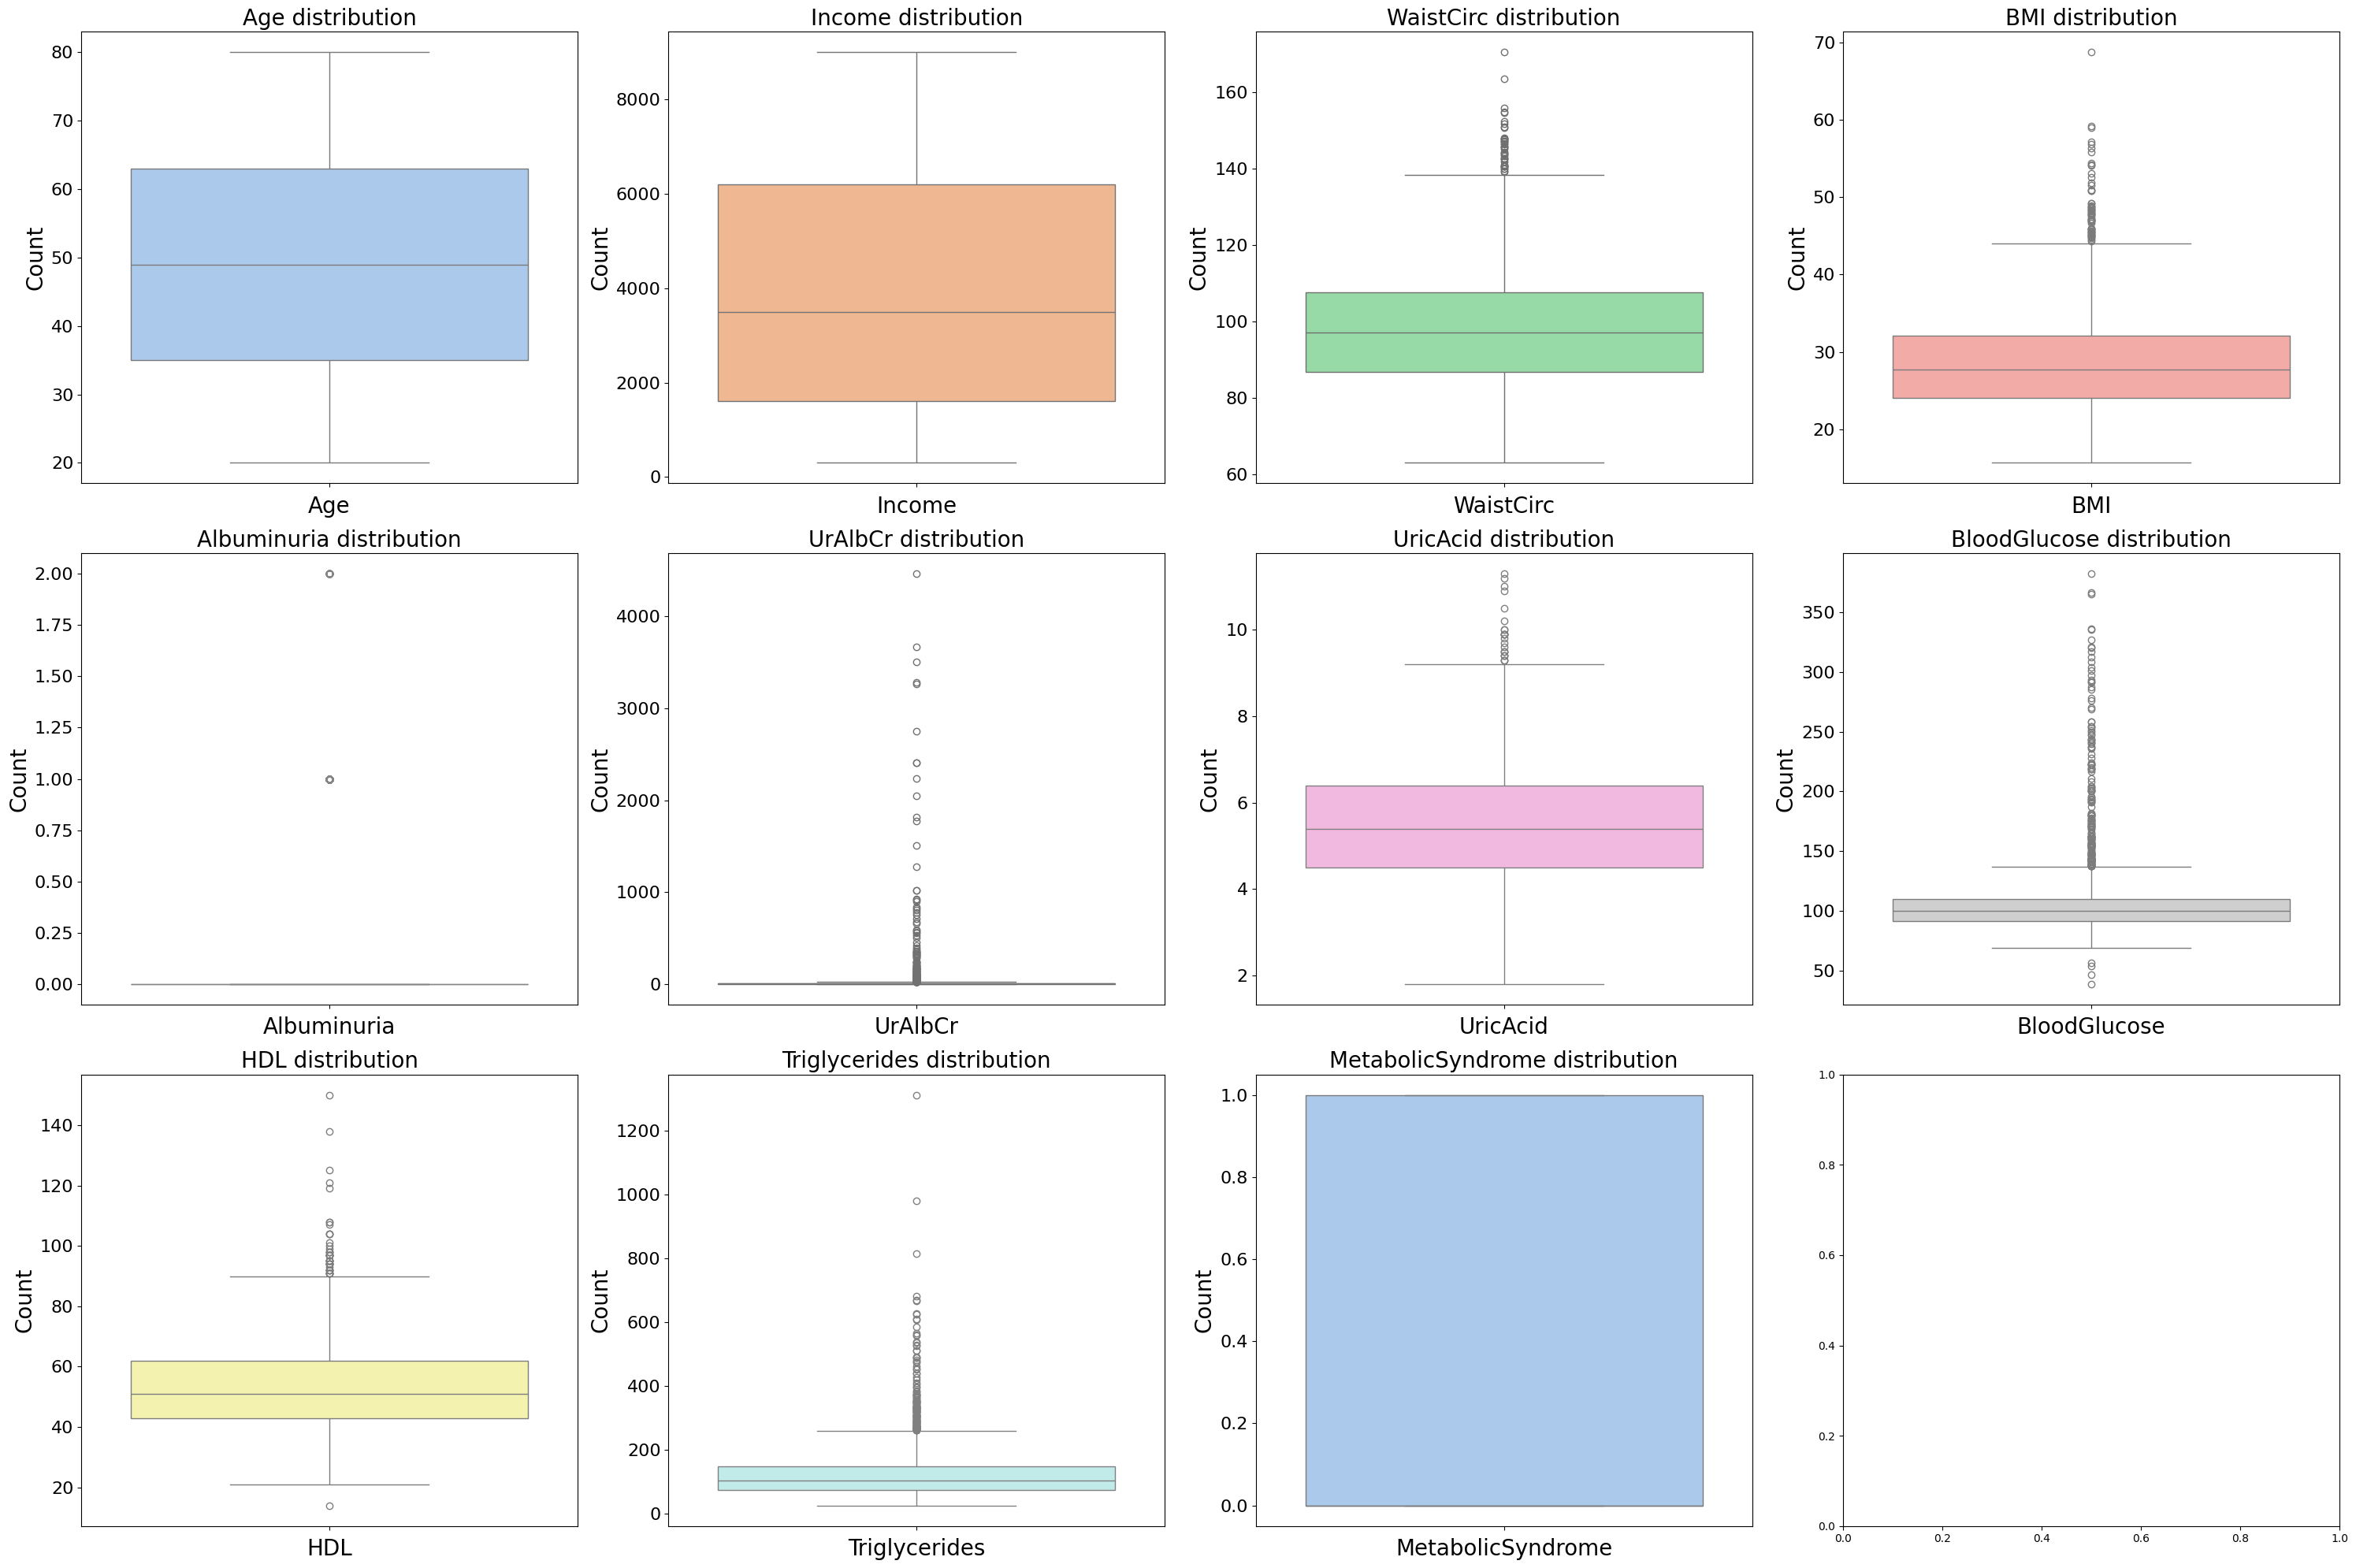

In [13]:
# Choose a palette with more unique colors
selected_palette = "pastel"
unique_colors = sns.color_palette(selected_palette, n_colors=len(numeric_cols))

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30,20))
for index, col in enumerate(numeric_cols):
    row_index = index // 4
    col_index = index % 4
    sns.boxplot(data=metabolic, y=col, ax=ax[row_index, col_index], color=unique_colors[index])
    ax[row_index, col_index].set_title(f'{col} distribution', fontsize=20)
    ax[row_index, col_index].set_xlabel(col, fontsize=20)
    ax[row_index, col_index].set_ylabel('Count', fontsize=20)
    ax[row_index, col_index].tick_params(axis='x', labelsize=16)
    ax[row_index, col_index].tick_params(axis='y', labelsize=16)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b></b> In numeric variables, only Age, Income and binary variable MetabolicSyndrome dont have outliers
</div>

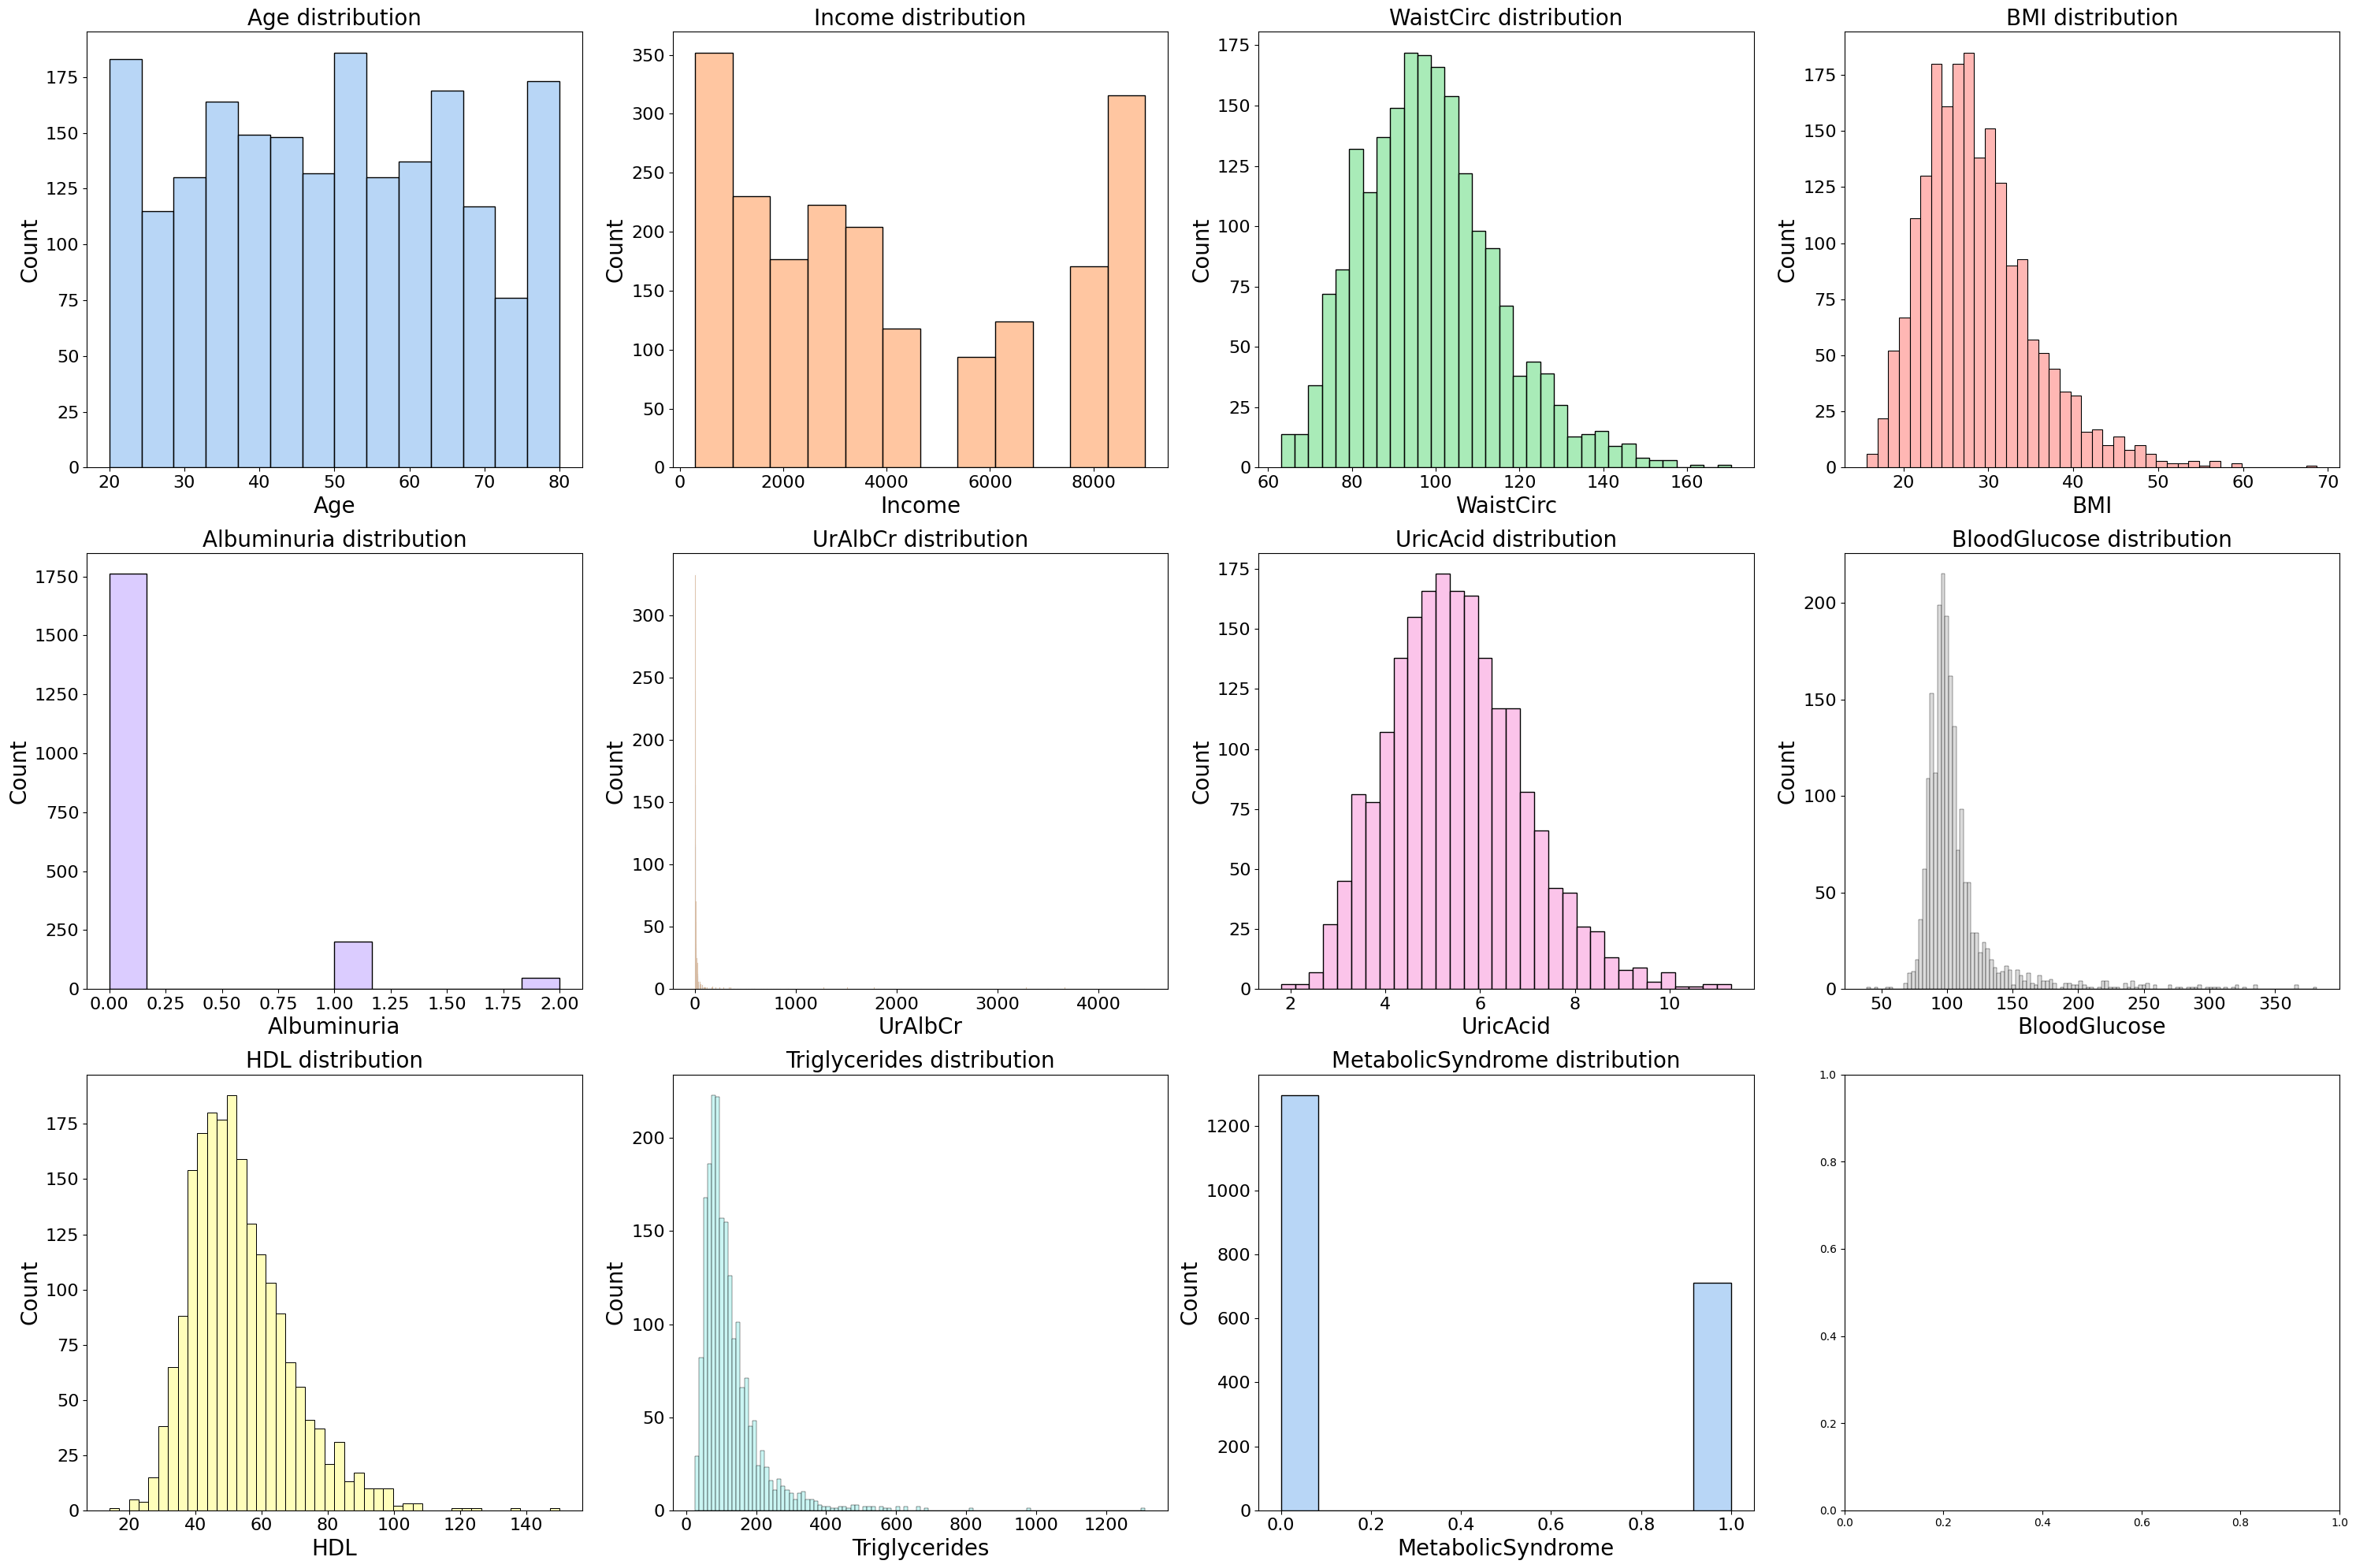

In [14]:
selected_palette = "pastel"
unique_colors = sns.color_palette(selected_palette, n_colors=len(numeric_cols))

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30,20))
for index, col in enumerate(numeric_cols):
    row_index = index // 4
    col_index = index % 4
    sns.histplot(data=metabolic, x=col, ax=ax[row_index, col_index], color=unique_colors[index])
    ax[row_index, col_index].set_title(f'{col} distribution', fontsize=20)
    ax[row_index, col_index].set_xlabel(col, fontsize=20)
    ax[row_index, col_index].set_ylabel('Count', fontsize=20)
    ax[row_index, col_index].tick_params(axis='x', labelsize=16)
    ax[row_index, col_index].tick_params(axis='y', labelsize=16)
    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b></b> Distributions of WaistCirc, BMI, HDL, Triglycerides, UricAcid and BloodGlucose are positively skewed. Age and Income are not normally distributed. The rest doesnt have a specific distribution
</div>

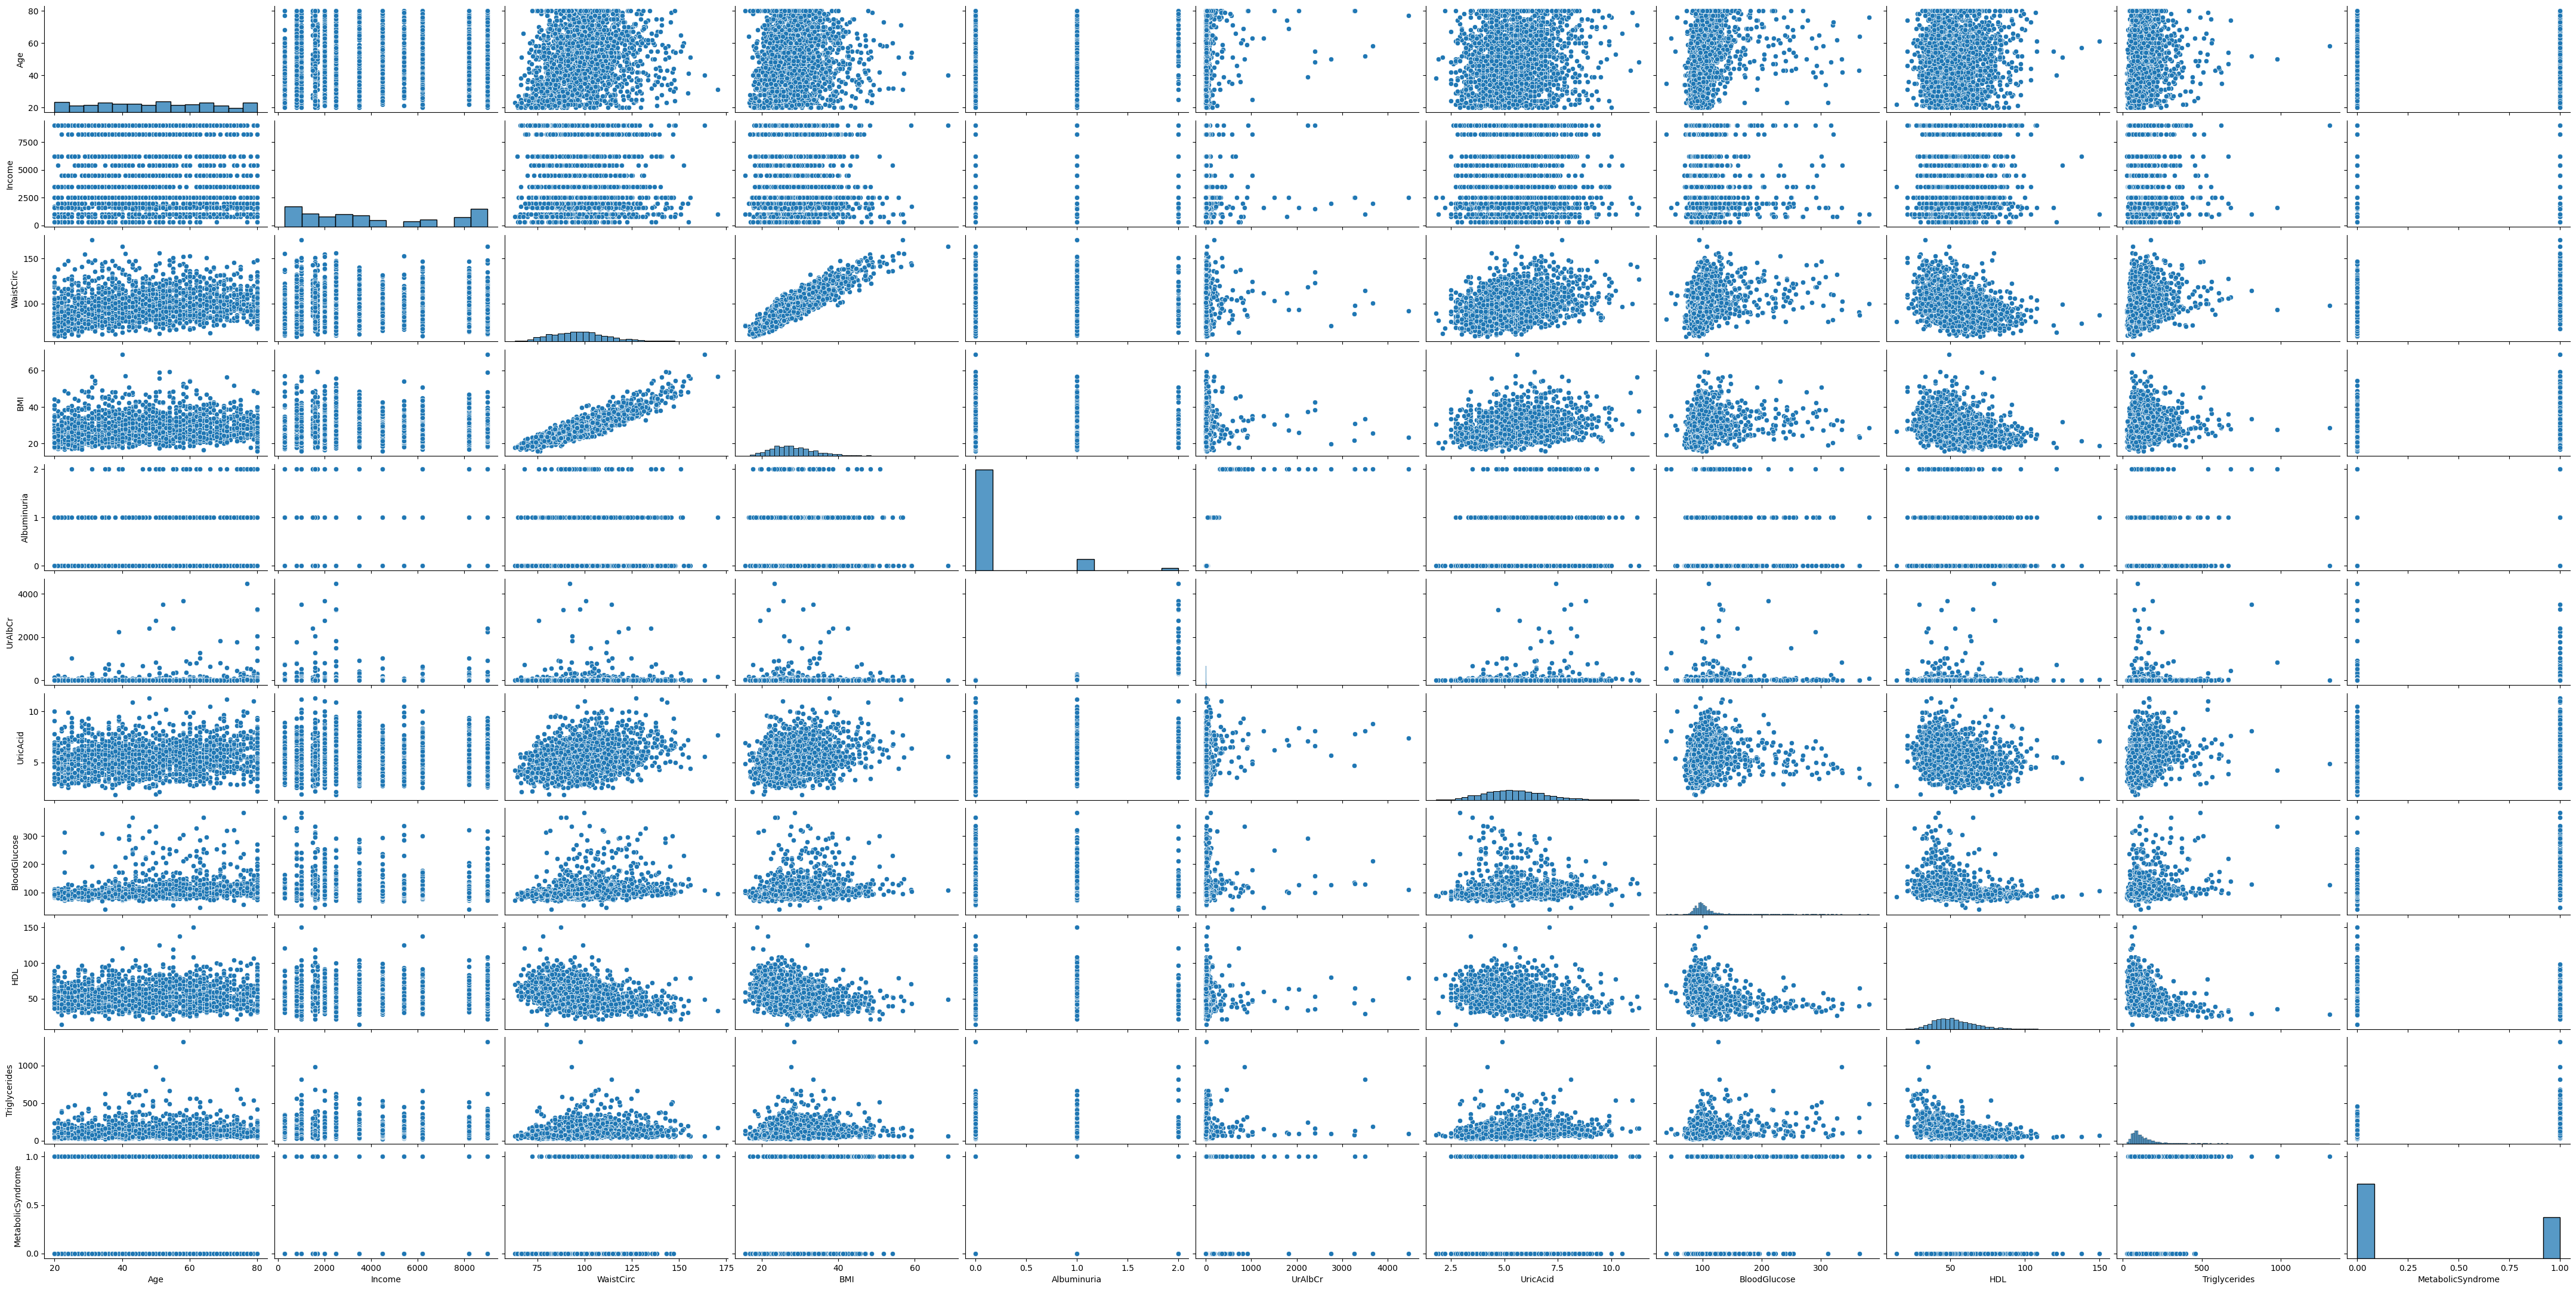

In [15]:

sns.pairplot(metabolic[numeric_cols], height=2, aspect=2)
sns.set_context("paper", rc={"axes.labelsize": 20, "xtick.labelsize": 15, "ytick.labelsize": 15})
# use pairplot to see the matrix

<div class="alert alert-block alert-info">
<b></b> BMI and WaistCirc are highly positively correlated to each other. Including both in the model will cause multillinearity which will affect model performance. We need to eliminate one of them.
</div>

Checking correlation among numeric variables

In [16]:
num_corr=metabolic.corr(numeric_only=True)
num_corr

Age    Income  WaistCirc       BMI  Albuminuria  \
Age                1.000000 -0.045014   0.238860  0.099314     0.208277   
Income            -0.045014  1.000000  -0.074313 -0.085924    -0.109709   
WaistCirc          0.238860 -0.074313   1.000000  0.909467     0.120229   
BMI                0.099314 -0.085924   0.909467  1.000000     0.080160   
Albuminuria        0.208277 -0.109709   0.120229  0.080160     1.000000   
UrAlbCr            0.107090 -0.052712   0.043249  0.023115     0.564887   
UricAcid           0.146276  0.008709   0.351764  0.273564     0.166195   
BloodGlucose       0.249467 -0.094043   0.279208  0.219237     0.201235   
HDL                0.050450  0.082505  -0.353359 -0.291676    -0.033457   
Triglycerides      0.096683 -0.036322   0.250379  0.171272     0.133788   
MetabolicSyndrome  0.276692 -0.098800   0.491204  0.431918     0.157671   

                    UrAlbCr  UricAcid  BloodGlucose       HDL  Triglycerides  \
Age                0.107090  0.146276      0.249467  0.050450       0.096683   
Income            -0.052712  0.008709     -0.094043  0.082505      -0.036322   
WaistCirc          0.043249  0.351764      0.279208 -0.353359       0.250379   
BMI                0.023115  0.273564      0.219237 -0.291676       0.171272   
Albuminuria        0.564887  0.166195      0.201235 -0.033457       0.133788   
UrAlbCr            1.000000  0.125384      0.126018 -0.007046       0.093926   
UricAcid           0.125384  1.000000      0.062735 -0.262014       0.214550   
BloodGlucose       0.126018  0.062735      1.000000 -0.215294       0.285475   
HDL               -0.007046 -0.262014     -0.215294  1.000000      -0.400794   
Triglycerides      0.093926  0.214550      0.285475 -0.400794       1.000000   
MetabolicSyndrome  0.073257  0.250926      0.376842 -0.370963       0.442063   

                   MetabolicSyndrome  
Age                         0.276692  
Income                     -0.098800  
WaistCirc                   0.491204  
BMI                         0.431918  
Albuminuria                 0.157671  
UrAlbCr                     0.073257  
UricAcid                    0.250926  
BloodGlucose                0.376842  
HDL                        -0.370963  
Triglycerides               0.442063  
MetabolicSyndrome           1.000000

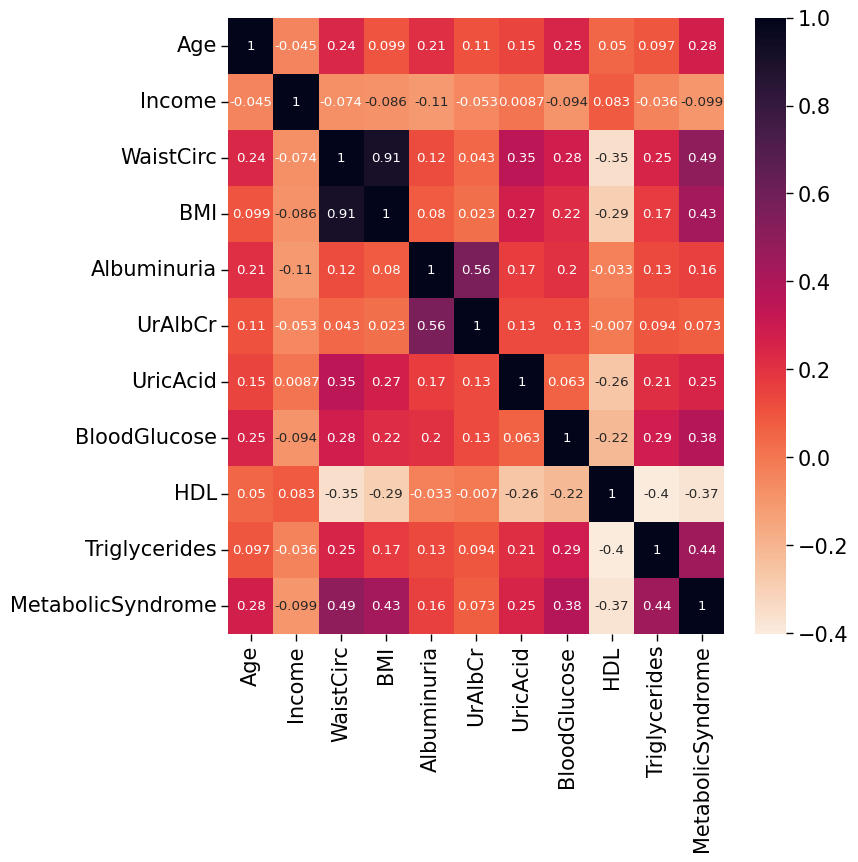

In [17]:
plt.figure(figsize=(8,8))
g=sns.heatmap(metabolic[numeric_cols].corr(),annot=True,cmap="rocket_r")

<div class="alert alert-block alert-info">
<b></b> BMI and WaistCirc are highly positively correlated to each other. Target variable is correlated with BMI, WaistCirc, BloodGlucose, Triglycerides.
</div>

In [18]:
metabolic.head()

Age     Sex  Marital  Income   Race  WaistCirc   BMI  Albuminuria  UrAlbCr  \
0   22    Male   Single  8200.0  White       81.0  23.3            0     3.88   
1   44  Female  Married  4500.0  White       80.1  23.2            0     8.55   
2   21    Male   Single   800.0  Asian       69.6  20.1            0     5.07   
3   43  Female   Single  2000.0  Black      120.4  33.3            0     5.22   
5   80    Male  Widowed   300.0  White      112.5  28.5            0     9.79   

   UricAcid  BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  
0       4.9            92   41             84                  0  
1       4.5            82   28             56                  0  
2       5.4           107   43             78                  0  
3       5.0           104   73            141                  0  
5       4.8           105   47            100                  0

Convert all categorical variables into dummies and check the correlation among variables

In [19]:
X2 = pd.get_dummies(metabolic, columns=categorical_cols, dtype=int)
X2.shape

(2009, 24)

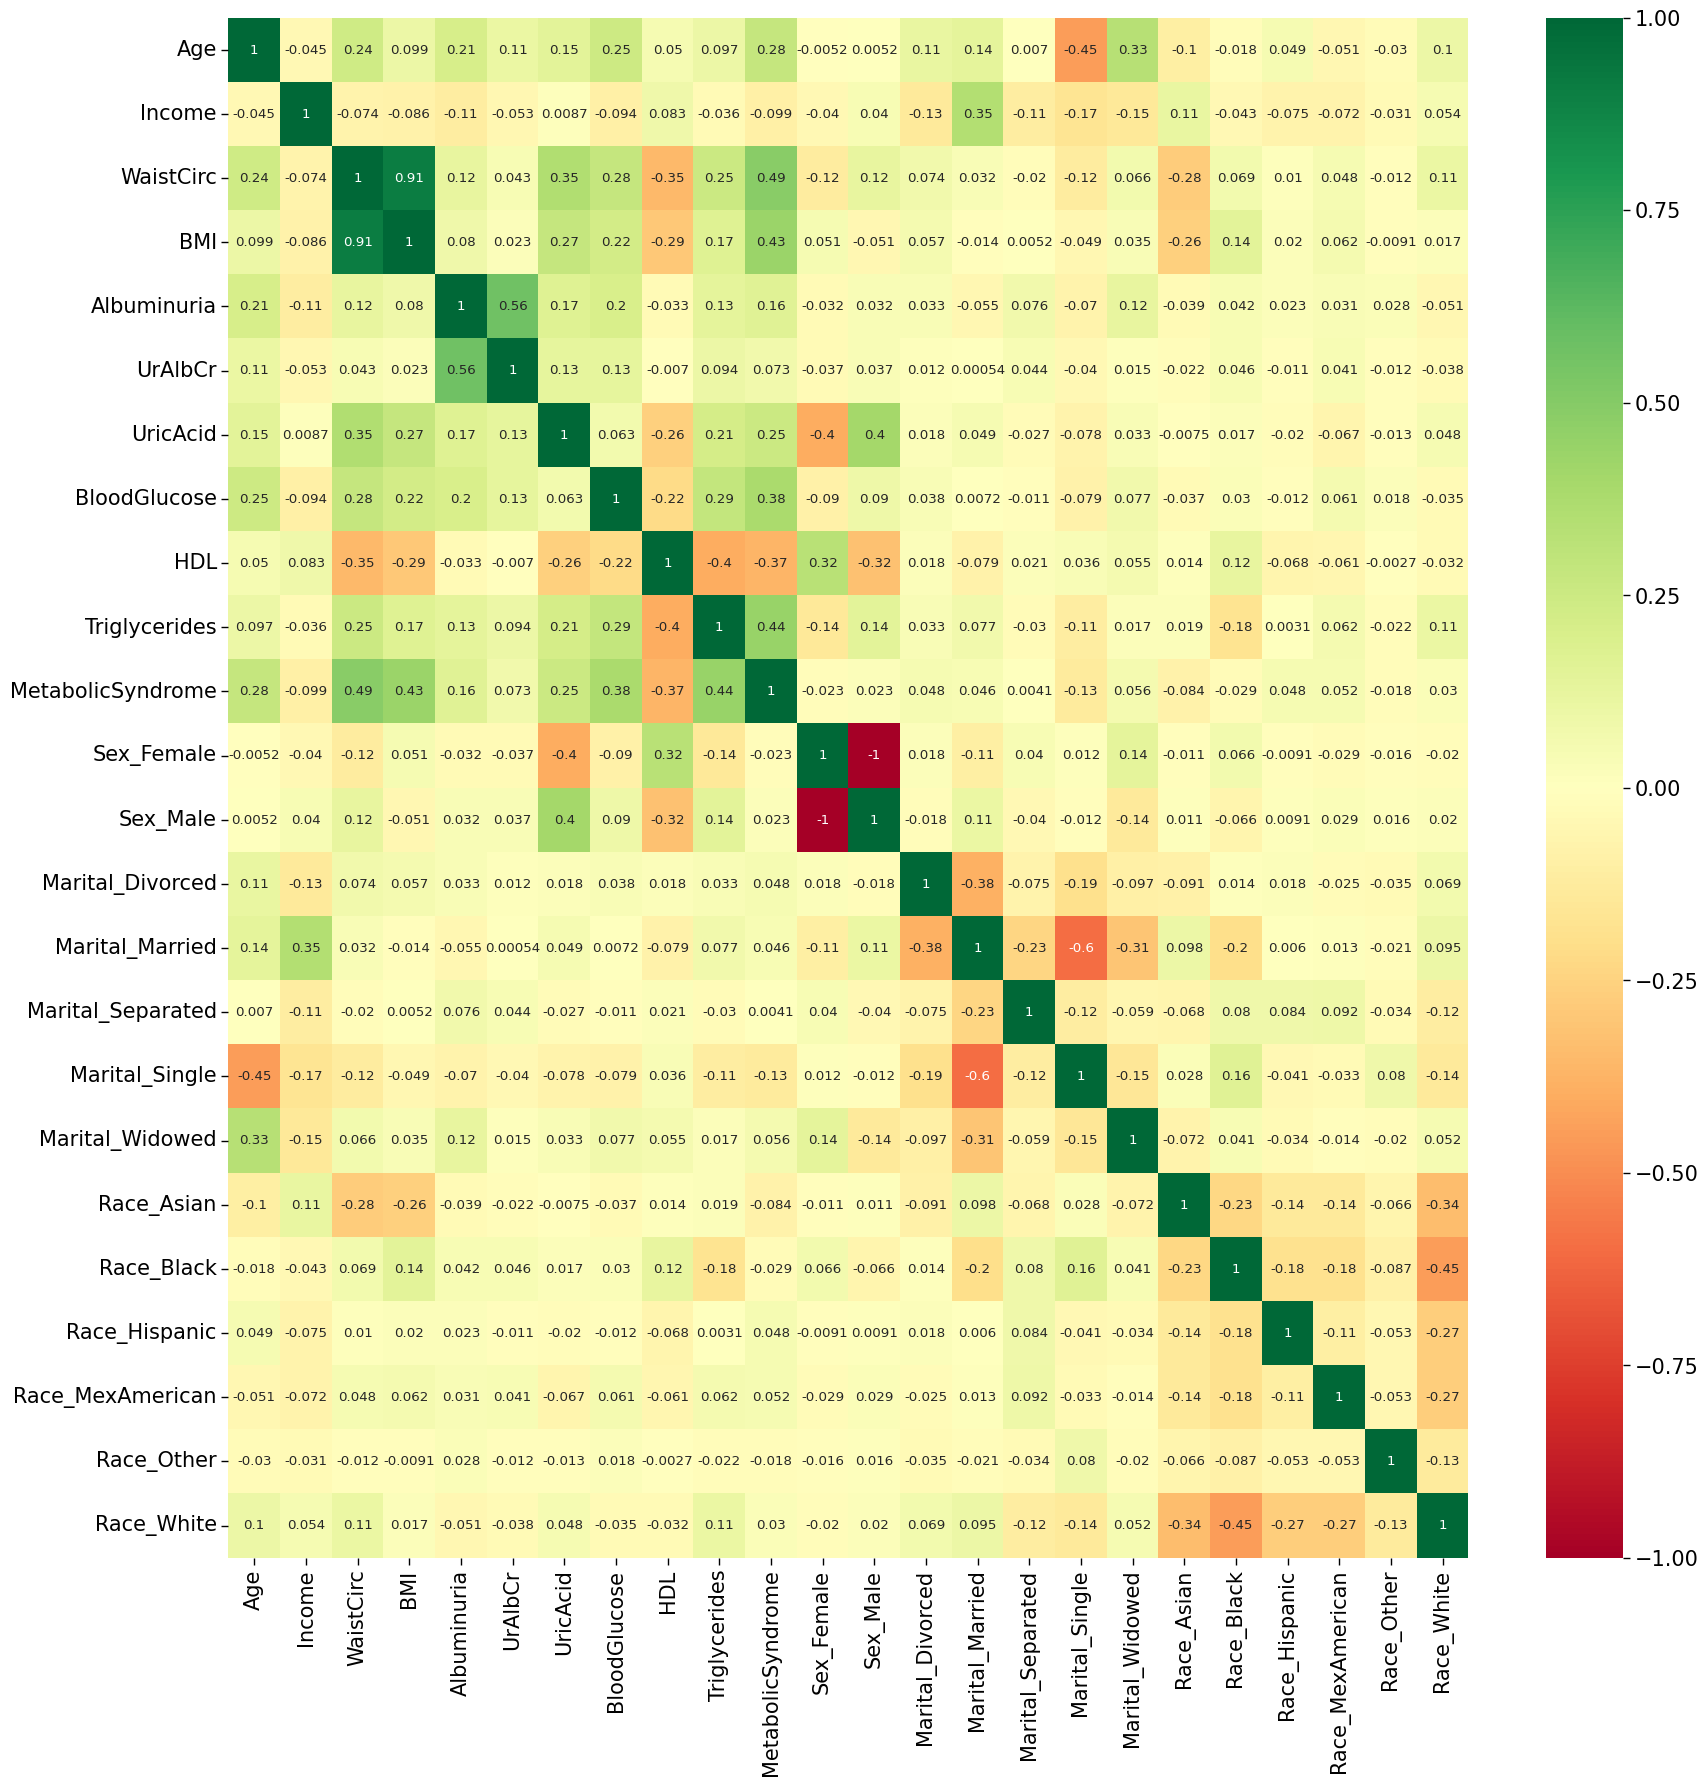

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

#get correlations of each features in dataset
# corrmat = data.corr(method='pearson') methods={‘pearson’, ‘kendall’, ‘spearman’} 

corrmat = X2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<div class="alert alert-block alert-info">
<b></b> Target variable is not correlated with categorical variables.
</div>

### 3.2 Categorical variables

Categorical variables

Checking distribution, value counts

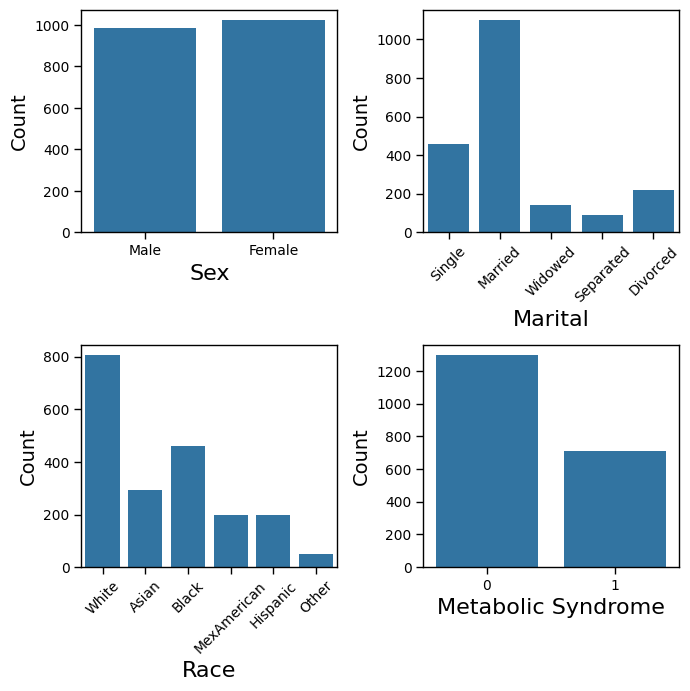

In [21]:
plt.figure(figsize=(7,7))
plt.subplot(221)
sns.countplot(x = metabolic.Sex)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.subplot(222)
sns.countplot(x = metabolic.Marital)
plt.xticks(size=10, rotation=45)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.xlabel('Marital', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.subplot(223)
sns.countplot(x = metabolic.Race)
plt.xticks(size=10, rotation=45)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.xlabel('Race', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.subplot(224)
sns.countplot(x = metabolic.MetabolicSyndrome)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.xlabel('Metabolic Syndrome', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b></b> Count the number of each value in each categorical variables.
</div>

## 4. Feature Engineering

Convert categorical variables into dummies and split data into X and y to do feature selection

In [22]:
X = pd.get_dummies(metabolic.drop('MetabolicSyndrome', axis=1), columns=categorical_cols, dtype=int)
y = metabolic['MetabolicSyndrome']

In [23]:
X.head()

Age  Income  WaistCirc   BMI  Albuminuria  UrAlbCr  UricAcid  BloodGlucose  \
0   22  8200.0       81.0  23.3            0     3.88       4.9            92   
1   44  4500.0       80.1  23.2            0     8.55       4.5            82   
2   21   800.0       69.6  20.1            0     5.07       5.4           107   
3   43  2000.0      120.4  33.3            0     5.22       5.0           104   
5   80   300.0      112.5  28.5            0     9.79       4.8           105   

   HDL  Triglycerides  ...  Marital_Married  Marital_Separated  \
0   41             84  ...                0                  0   
1   28             56  ...                1                  0   
2   43             78  ...                0                  0   
3   73            141  ...                0                  0   
5   47            100  ...                0                  0   

   Marital_Single  Marital_Widowed  Race_Asian  Race_Black  Race_Hispanic  \
0               1                0           0           0              0   
1               0                0           0           0              0   
2               1                0           1           0              0   
3               1                0           0           1              0   
5               0                1           0           0              0   

   Race_MexAmerican  Race_Other  Race_White  
0                 0           0           1  
1                 0           0           1  
2                 0           0           0  
3                 0           0           0  
5                 0           0           1  

[5 rows x 23 columns]

Lasso Regression

In [24]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
reg.fit(X, y)

# Calculate absolute coefficients
coef = pd.Series(reg.coef_, index=X.columns)
abs_coef = abs(coef)

# Sort the features by absolute coefficients in descending order
sorted_features1 = abs_coef.sort_values(ascending=False)

# Rank the features
ranked_features = sorted_features1.rank(ascending=False).astype(int)
selected_feature2 = pd.DataFrame({'Selected_Features': sorted_features1.index, 'Ranking': ranked_features[sorted_features1.index]})
selected_feature2 = selected_feature2.reset_index(drop=True)
print("Lasso picked " + str(sum(coef != 0)) +
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
selected_feature2

Lasso picked 6 variables and eliminated the other 17 variables


Selected_Features  Ranking
0           WaistCirc        1
1                 HDL        2
2                 Age        3
3        BloodGlucose        4
4       Triglycerides        5
5              Income        6
6   Marital_Separated       15
7          Race_Other       15
8    Race_MexAmerican       15
9       Race_Hispanic       15
10         Race_Black       15
11         Race_Asian       15
12    Marital_Widowed       15
13     Marital_Single       15
14           Sex_Male       15
15    Marital_Married       15
16   Marital_Divorced       15
17         Sex_Female       15
18           UricAcid       15
19            UrAlbCr       15
20        Albuminuria       15
21                BMI       15
22         Race_White       15

Chi-square

In [25]:
#Chi-square
from sklearn.feature_selection import chi2
chi_scores = chi2(X, y)
chi_scores

(array([9.47136345e+02, 4.21009701e+04, 1.30755032e+03, 5.64509491e+02,
        5.87831399e+01, 1.48642305e+04, 4.70054622e+01, 2.98711780e+03,
        1.16292791e+03, 2.49473754e+04, 5.36645101e-01, 5.55675069e-01,
        4.12982454e+00, 1.90266216e+00, 3.27746201e-02, 2.47384003e+01,
        5.91970415e+00, 1.20757949e+01, 1.30280165e+00, 4.22064984e+00,
        4.85318324e+00, 6.46830304e-01, 1.11653930e+00]),
 array([5.56201823e-208, 0.00000000e+000, 2.58484194e-286, 8.78334735e-125,
        1.76043328e-014, 0.00000000e+000, 7.07891440e-012, 0.00000000e+000,
        6.95352235e-255, 0.00000000e+000, 4.63826441e-001, 4.56008091e-001,
        4.21337191e-002, 1.67780641e-001, 8.56338047e-001, 6.56627933e-007,
        1.49724724e-002, 5.10806812e-004, 2.53702103e-001, 3.99348636e-002,
        2.75951608e-002, 4.21248213e-001, 2.90664854e-001]))

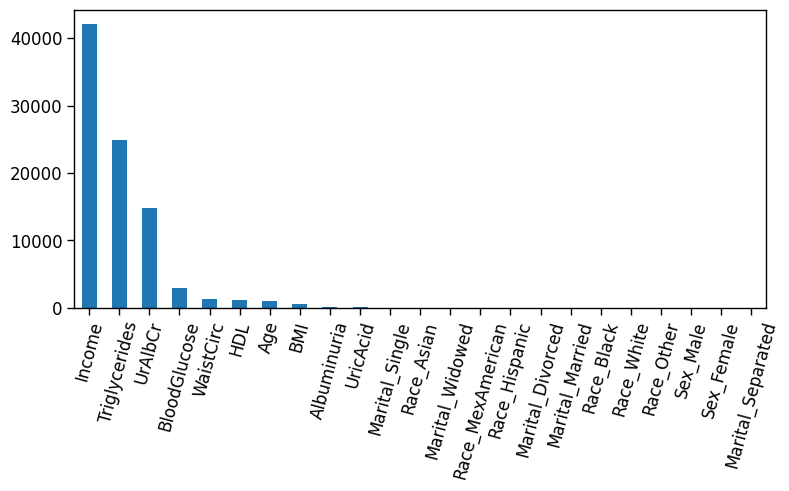

In [26]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust the figure size as needed
chi_values.plot.bar(ax=ax, fontsize=12, rot=75)  # Adjust the font size as needed
plt.tight_layout()
plt.show()

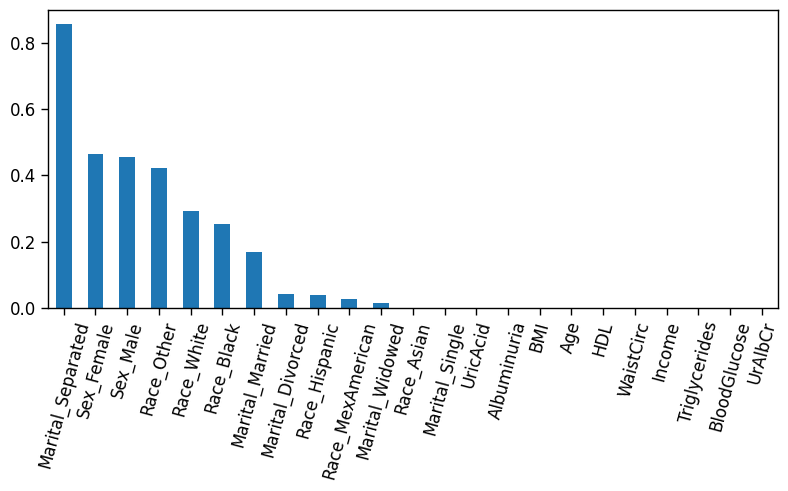

In [27]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(8, 5))  # Adjust the figure size as needed
p_values.plot.bar(ax=ax, fontsize=12, rot=75)  # Adjust the font size as needed
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b></b> From the 2 methods, we choose 6 variables that are important in predicting the target variables: WaistCirc, HDL, Age, BloodGlucose, Triglycerides, Income.
</div>

In [28]:
chosen_var = ['WaistCirc', 'HDL', 'Age', 'BloodGlucose', 'Triglycerides', 'Income', 'MetabolicSyndrome']

In [29]:
chosen_input = ['WaistCirc', 'HDL', 'Age', 'BloodGlucose', 'Triglycerides', 'Income']

## 5. Data preparation

In [30]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import math

In [32]:
# checking if the distributions are normal
for input in chosen_input:

	stat, p = shapiro(metabolic[input])
	print(f'{input}')
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print(f'{input} looks Gaussian (fail to reject H0)')
	else:
		print(f'{input} does not look Gaussian (reject H0)')
	print()

WaistCirc
Statistics=0.977, p=0.000
WaistCirc does not look Gaussian (reject H0)

HDL
Statistics=0.951, p=0.000
HDL does not look Gaussian (reject H0)

Age
Statistics=0.962, p=0.000
Age does not look Gaussian (reject H0)

BloodGlucose
Statistics=0.608, p=0.000
BloodGlucose does not look Gaussian (reject H0)

Triglycerides
Statistics=0.711, p=0.000
Triglycerides does not look Gaussian (reject H0)

Income
Statistics=0.862, p=0.000
Income does not look Gaussian (reject H0)



In [33]:
# skewness levels
metabolic[chosen_var].skew()

WaistCirc            0.625677
HDL                  1.007966
Age                  0.082128
BloodGlucose         3.809333
Triglycerides        3.729250
Income               0.539272
MetabolicSyndrome    0.609215
dtype: float64

<div class="alert alert-block alert-info">
<b></b> Age, Income and MetabolicSyndrome will not be transformed because their skewness levels are not much, using log10 transformation will make them become negatively skewed with larger magnitude of skewness.
</div>

Correct skewness using log10 transformation

In [34]:
metabolic['HDL_unskewed'] = metabolic['HDL'].apply(lambda x: math.log10(1+ abs(x)))
metabolic['WaistCirc_unskewed'] = metabolic['WaistCirc'].apply(lambda x: math.log10(1+ abs(x)))
metabolic['BloodGlucose_unskewed'] = metabolic['BloodGlucose'].apply(lambda x: math.log10(1+ abs(x)))
metabolic['Triglycerides_unskewed'] = metabolic['Triglycerides'].apply(lambda x: math.log10(1+ abs(x)))

In [36]:
# checking skewness level after correcting skewness
metabolic[['HDL_unskewed', 'WaistCirc_unskewed', 'BloodGlucose_unskewed', 'Triglycerides_unskewed']].skew()

HDL_unskewed              0.071918
WaistCirc_unskewed        0.157520
BloodGlucose_unskewed     2.207752
Triglycerides_unskewed    0.515142
dtype: float64

In [40]:
metabolic.head()

Age     Sex  Marital  Income   Race  WaistCirc   BMI  Albuminuria  UrAlbCr  \
0   22    Male   Single  8200.0  White       81.0  23.3            0     3.88   
1   44  Female  Married  4500.0  White       80.1  23.2            0     8.55   
2   21    Male   Single   800.0  Asian       69.6  20.1            0     5.07   
3   43  Female   Single  2000.0  Black      120.4  33.3            0     5.22   
5   80    Male  Widowed   300.0  White      112.5  28.5            0     9.79   

   UricAcid  BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  \
0       4.9            92   41             84                  0   
1       4.5            82   28             56                  0   
2       5.4           107   43             78                  0   
3       5.0           104   73            141                  0   
5       4.8           105   47            100                  0   

   HDL_unskewed  WaistCirc_unskewed  BloodGlucose_unskewed  \
0      1.623249            1.913814               1.968483   
1      1.462398            1.909021               1.919078   
2      1.643453            1.848805               2.033424   
3      1.869232            2.084219               2.021189   
5      1.681241            2.054996               2.025306   

   Triglycerides_unskewed  
0                1.929419  
1                1.755875  
2                1.897627  
3                2.152288  
5                2.004321

Remove the old skewed variables

In [41]:
metabolic = metabolic.drop(['HDL', 'WaistCirc', 'BloodGlucose', 'Triglycerides'], axis=1)

make a copy of the dataset for further preparation and modeling, while keep the original dataset metabolic available for further experiments if needed

In [42]:
metabolic1 = metabolic.copy()

In [43]:
metabolic1.head()

Age     Sex  Marital  Income   Race   BMI  Albuminuria  UrAlbCr  UricAcid  \
0   22    Male   Single  8200.0  White  23.3            0     3.88       4.9   
1   44  Female  Married  4500.0  White  23.2            0     8.55       4.5   
2   21    Male   Single   800.0  Asian  20.1            0     5.07       5.4   
3   43  Female   Single  2000.0  Black  33.3            0     5.22       5.0   
5   80    Male  Widowed   300.0  White  28.5            0     9.79       4.8   

   MetabolicSyndrome  HDL_unskewed  WaistCirc_unskewed  BloodGlucose_unskewed  \
0                  0      1.623249            1.913814               1.968483   
1                  0      1.462398            1.909021               1.919078   
2                  0      1.643453            1.848805               2.033424   
3                  0      1.869232            2.084219               2.021189   
5                  0      1.681241            2.054996               2.025306   

   Triglycerides_unskewed  
0                1.929419  
1                1.755875  
2                1.897627  
3                2.152288  
5                2.004321

Remove all variables that are not chosen by feature engineering

In [44]:
metabolic1 = metabolic1.drop(['Sex', 'Marital', 'Race','BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid'], axis=1)

In [45]:
metabolic1.head()

Age  Income  MetabolicSyndrome  HDL_unskewed  WaistCirc_unskewed  \
0   22  8200.0                  0      1.623249            1.913814   
1   44  4500.0                  0      1.462398            1.909021   
2   21   800.0                  0      1.643453            1.848805   
3   43  2000.0                  0      1.869232            2.084219   
5   80   300.0                  0      1.681241            2.054996   

   BloodGlucose_unskewed  Triglycerides_unskewed  
0               1.968483                1.929419  
1               1.919078                1.755875  
2               2.033424                1.897627  
3               2.021189                2.152288  
5               2.025306                2.004321

Checking outliers

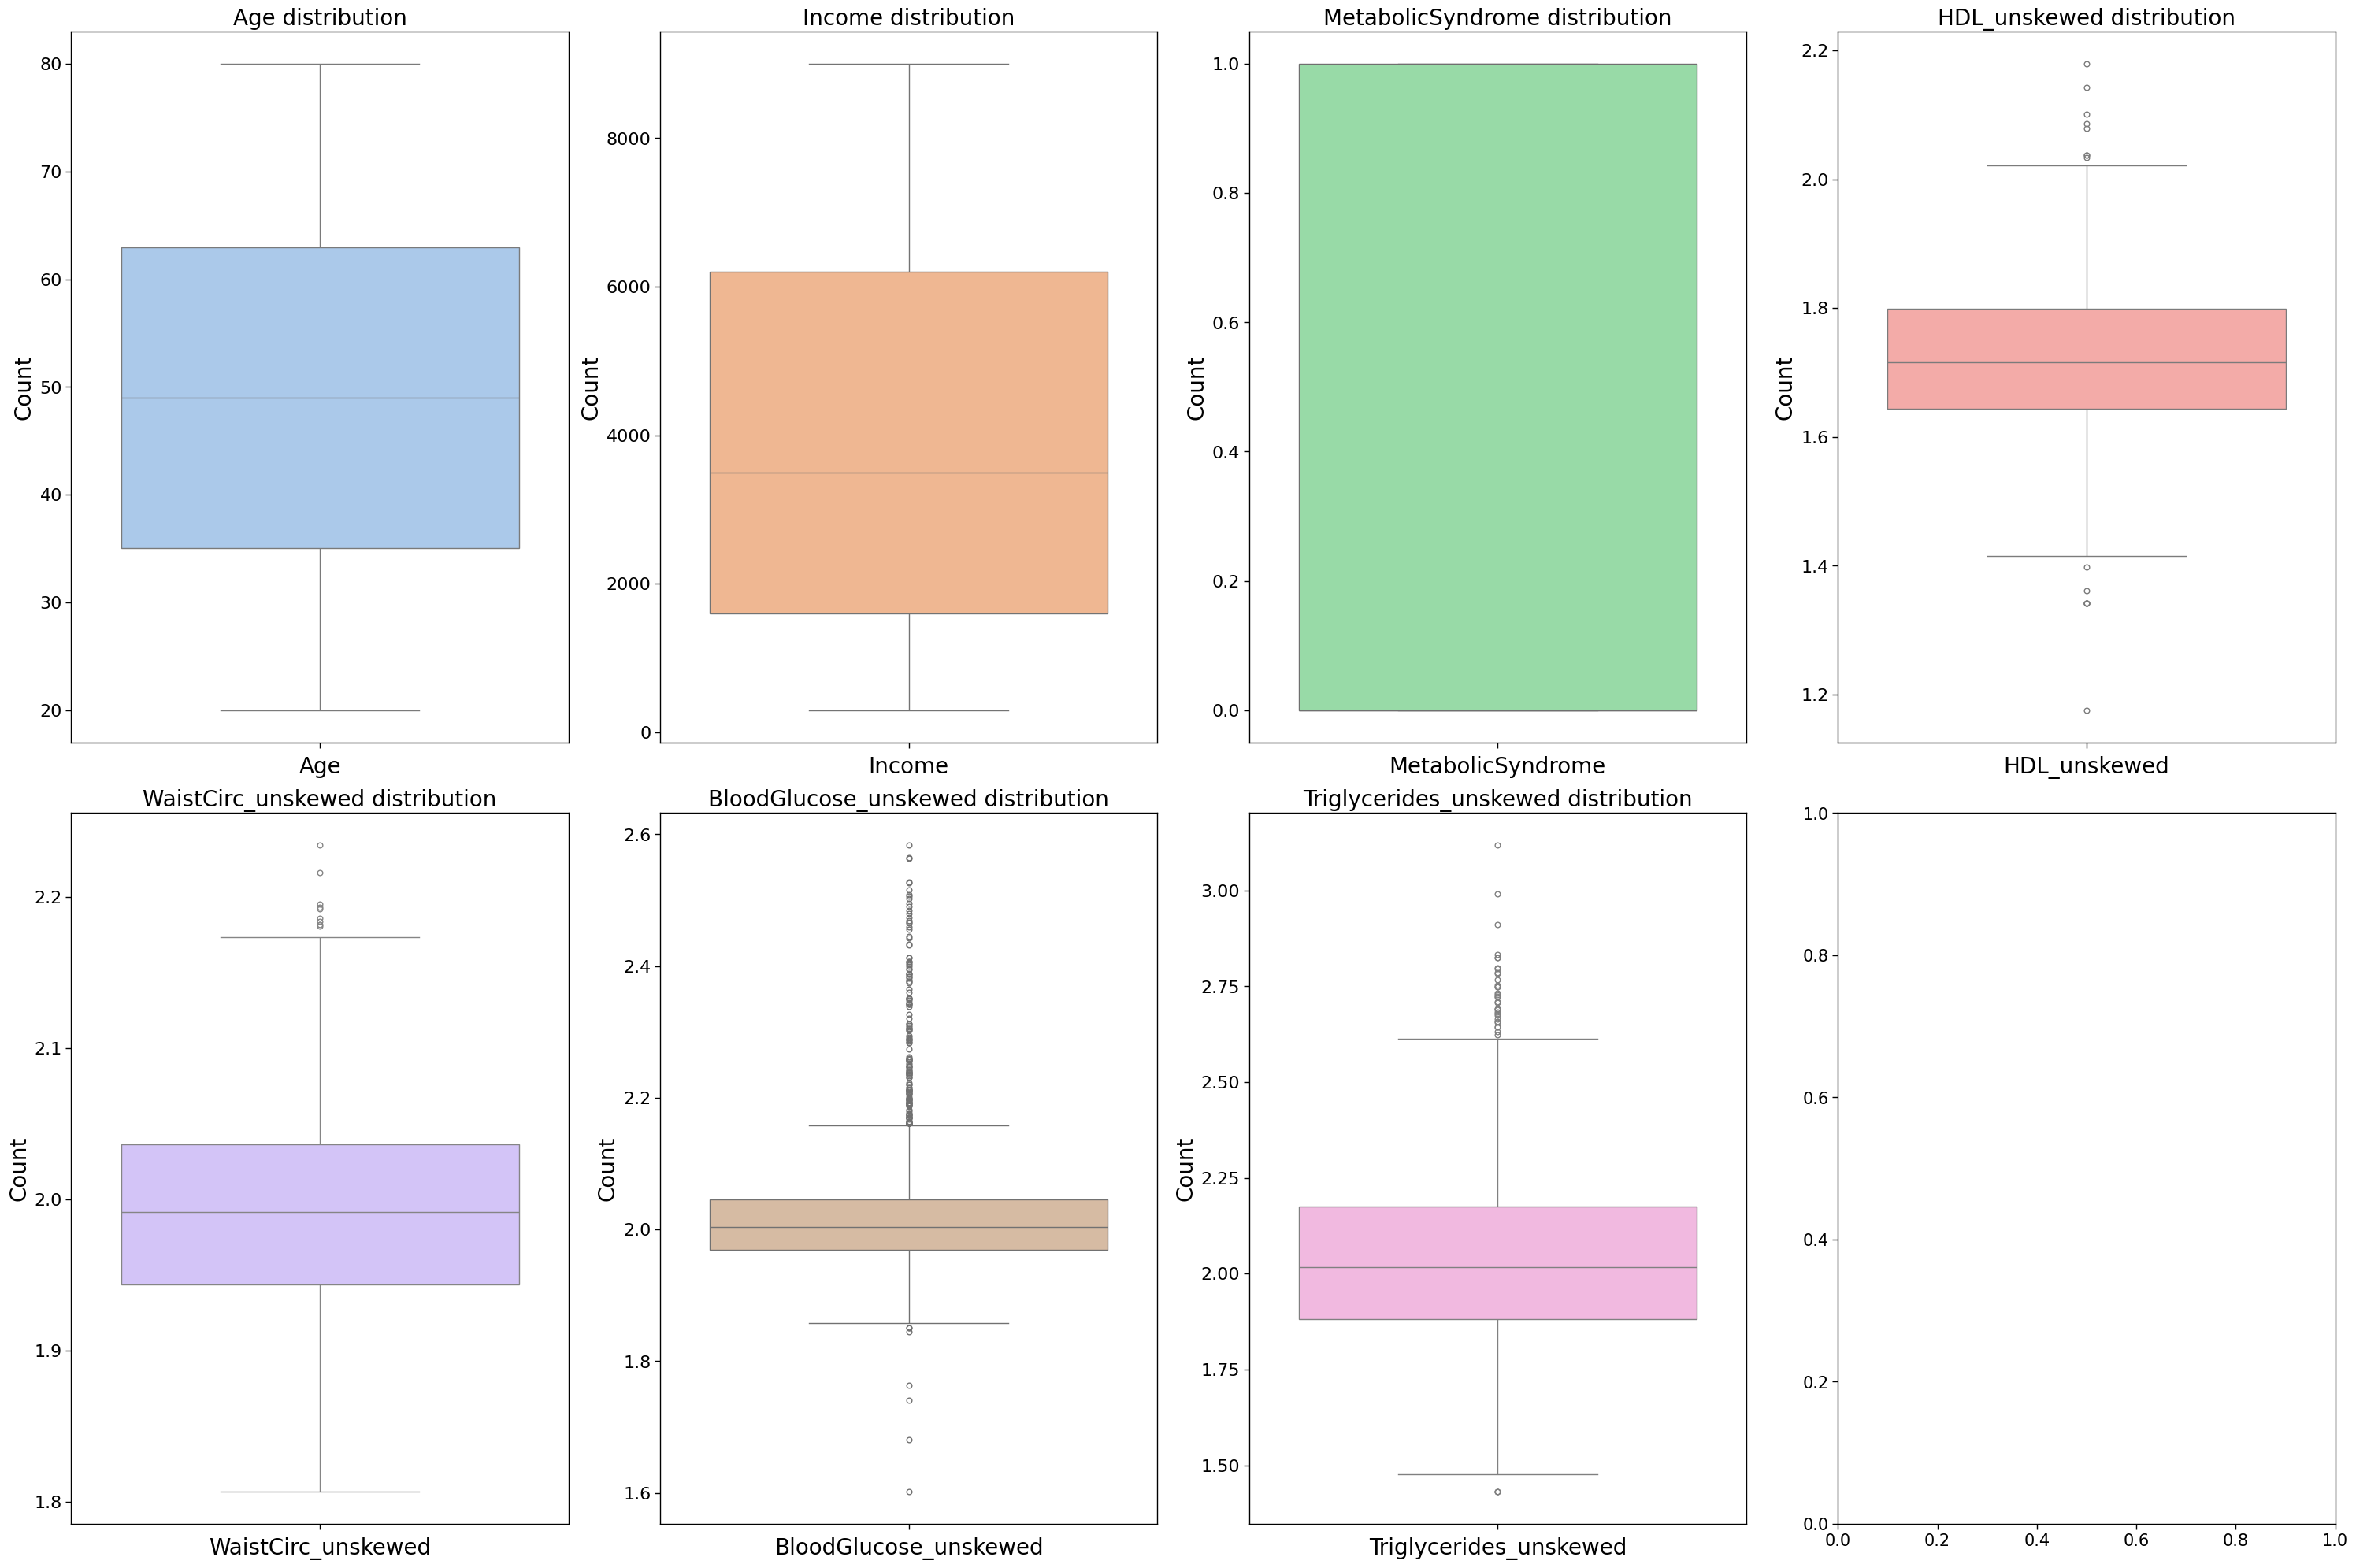

In [46]:
# Choose a palette with more unique colors
selected_palette = "pastel"
unique_colors = sns.color_palette(selected_palette, n_colors=len(metabolic1.columns))

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30,20))
for index, col in enumerate(metabolic1.columns):
    row_index = index // 4
    col_index = index % 4
    sns.boxplot(data=metabolic1, y=col, ax=ax[row_index, col_index], color=unique_colors[index])
    ax[row_index, col_index].set_title(f'{col} distribution', fontsize=20)
    ax[row_index, col_index].set_xlabel(col, fontsize=20)
    ax[row_index, col_index].set_ylabel('Count', fontsize=20)
    ax[row_index, col_index].tick_params(axis='x', labelsize=16)
    ax[row_index, col_index].tick_params(axis='y', labelsize=16)
plt.tight_layout()
plt.show()

Count number of outliers in each variable

In [47]:
for column in metabolic1.columns:
    Q1, Q3 = np.percentile(metabolic1[column], [25, 75])
    IQR= Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    outliers1 = (metabolic1[column] < lower_threshold)
    outliers2 = (metabolic1[column] > upper_threshold)
    print(f'small outlier: ',outliers1.value_counts())
    print('big outliers: ', outliers2.value_counts())
    print('----------')

small outlier:  Age
False    2009
Name: count, dtype: int64
big outliers:  Age
False    2009
Name: count, dtype: int64
----------
small outlier:  Income
False    2009
Name: count, dtype: int64
big outliers:  Income
False    2009
Name: count, dtype: int64
----------
small outlier:  MetabolicSyndrome
False    2009
Name: count, dtype: int64
big outliers:  MetabolicSyndrome
False    2009
Name: count, dtype: int64
----------
small outlier:  HDL_unskewed
False    2002
True        7
Name: count, dtype: int64
big outliers:  HDL_unskewed
False    2001
True        8
Name: count, dtype: int64
----------
small outlier:  WaistCirc_unskewed
False    2009
Name: count, dtype: int64
big outliers:  WaistCirc_unskewed
False    2000
True        9
Name: count, dtype: int64
----------
small outlier:  BloodGlucose_unskewed
False    2002
True        7
Name: count, dtype: int64
big outliers:  BloodGlucose_unskewed
False    1856
True      153
Name: count, dtype: int64
----------
small outlier:  Triglycerides_un

Using 1.5*IQR to remove outliers

In [49]:
Q1, Q3 = np.percentile(metabolic1['HDL_unskewed'], [25, 75])
IQR= Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
metabolic1=metabolic1[(metabolic1['HDL_unskewed']> lower_threshold) & (metabolic1['HDL_unskewed']< upper_threshold)]

In [50]:
Q1, Q3 = np.percentile(metabolic1['WaistCirc_unskewed'], [25, 75])
IQR= Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
metabolic1=metabolic1[(metabolic1['WaistCirc_unskewed']> lower_threshold) & (metabolic1['WaistCirc_unskewed']< upper_threshold)]

In [51]:
Q1, Q3 = np.percentile(metabolic1['BloodGlucose_unskewed'], [25, 75])
IQR= Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
metabolic1=metabolic1[(metabolic1['BloodGlucose_unskewed']> lower_threshold) & (metabolic1['BloodGlucose_unskewed']< upper_threshold)]

In [52]:
Q1, Q3 = np.percentile(metabolic1['Triglycerides_unskewed'], [25, 75])
IQR= Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
metabolic1=metabolic1[(metabolic1['Triglycerides_unskewed']> lower_threshold) & (metabolic1['Triglycerides_unskewed']< upper_threshold)]

In [53]:
metabolic1.shape

(1809, 7)

Scaling using MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler
num_cols = metabolic1.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols[num_cols != 'MetabolicSyndrome']
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the numerical columns
metabolic1[num_cols] = scaler.fit_transform(metabolic1[num_cols])

metabolic1.head()


Age    Income  MetabolicSyndrome  HDL_unskewed  WaistCirc_unskewed  \
0  0.033333  0.908046                  0      0.325326            0.291735   
1  0.400000  0.482759                  0      0.052616            0.278662   
2  0.016667  0.057471                  0      0.359579            0.114415   
3  0.383333  0.195402                  0      0.742369            0.756535   
5  1.000000  0.000000                  0      0.423646            0.676826   

   BloodGlucose_unskewed  Triglycerides_unskewed  
0               0.369234                0.425830  
1               0.205114                0.277453  
2               0.584963                0.398649  
3               0.544321                0.616381  
5               0.557995                0.489871

In [55]:
metabolic1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1809 entries, 0 to 2400
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1809 non-null   float64
 1   Income                  1809 non-null   float64
 2   MetabolicSyndrome       1809 non-null   int64  
 3   HDL_unskewed            1809 non-null   float64
 4   WaistCirc_unskewed      1809 non-null   float64
 5   BloodGlucose_unskewed   1809 non-null   float64
 6   Triglycerides_unskewed  1809 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 113.1 KB


Checking again the outliers and distributions of chosen variables

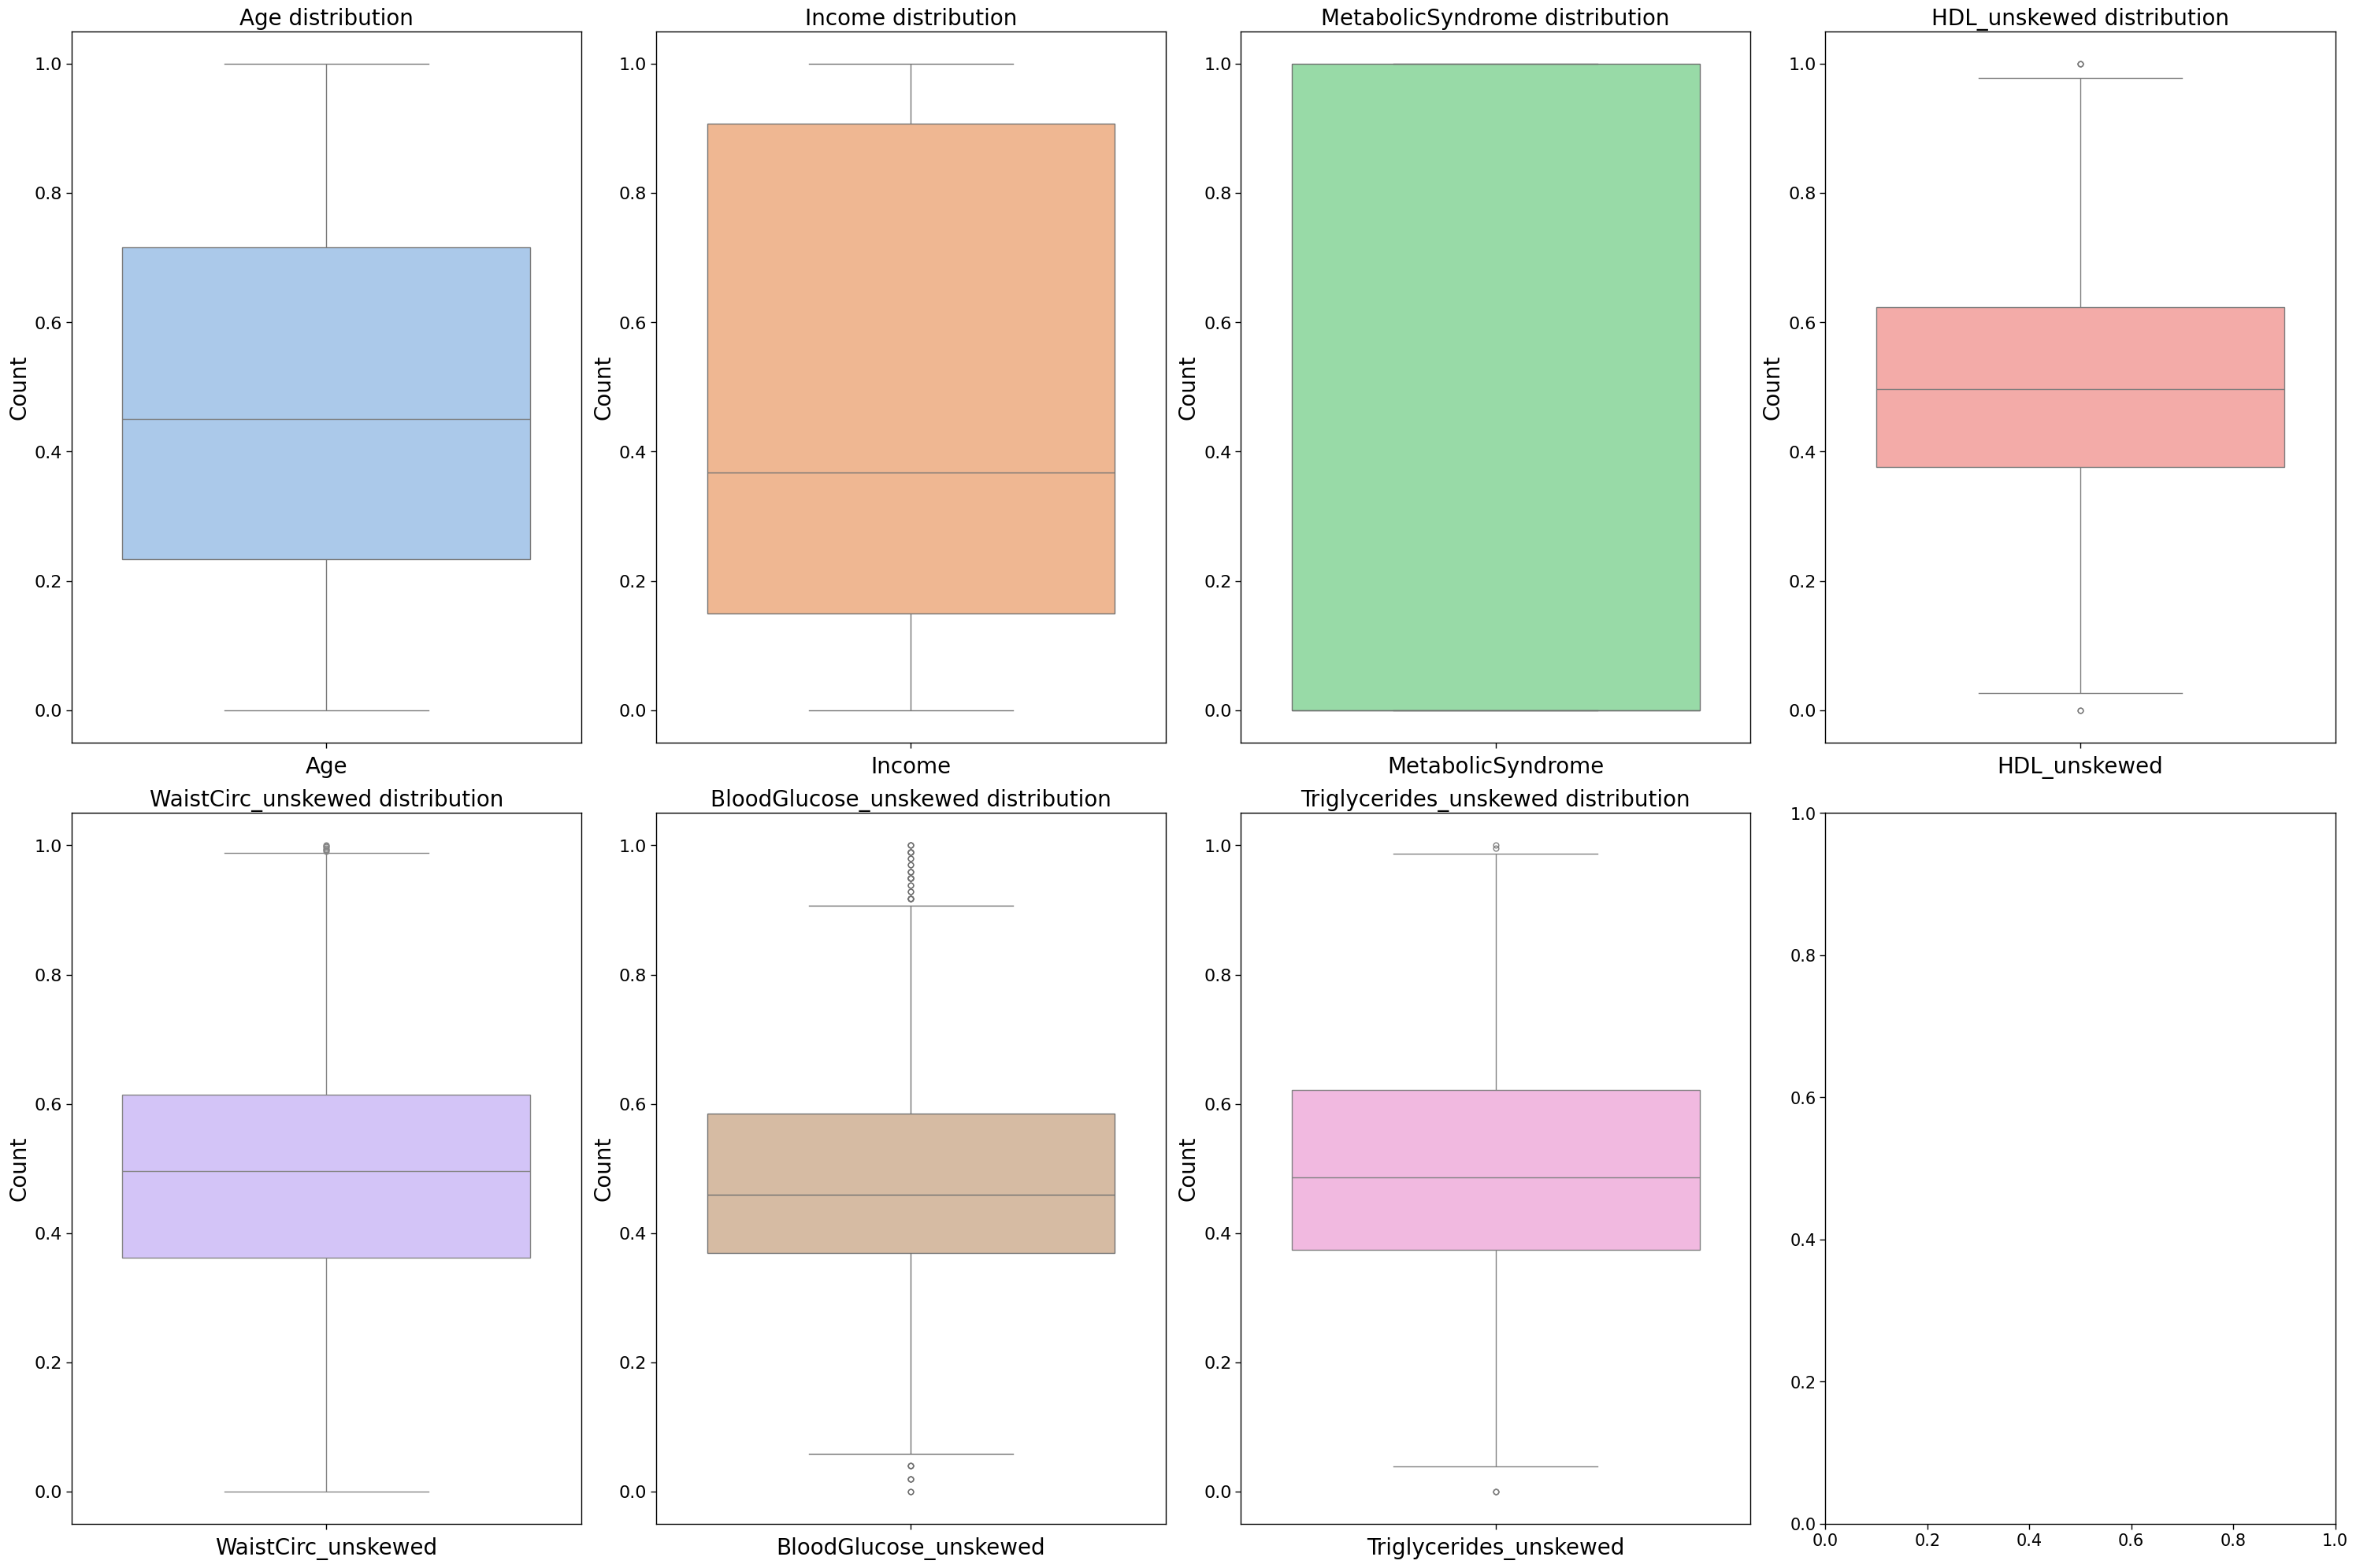

In [56]:
selected_palette = "pastel"
unique_colors = sns.color_palette(selected_palette, n_colors=len(metabolic1.columns))

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30,20))
for index, col in enumerate(metabolic1.columns):
    row_index = index // 4
    col_index = index % 4
    sns.boxplot(data=metabolic1, y=col, ax=ax[row_index, col_index], color=unique_colors[index])
    ax[row_index, col_index].set_title(f'{col} distribution', fontsize=20)
    ax[row_index, col_index].set_xlabel(col, fontsize=20)
    ax[row_index, col_index].set_ylabel('Count', fontsize=20)
    ax[row_index, col_index].tick_params(axis='x', labelsize=16)
    ax[row_index, col_index].tick_params(axis='y', labelsize=16)
plt.tight_layout()
plt.show()

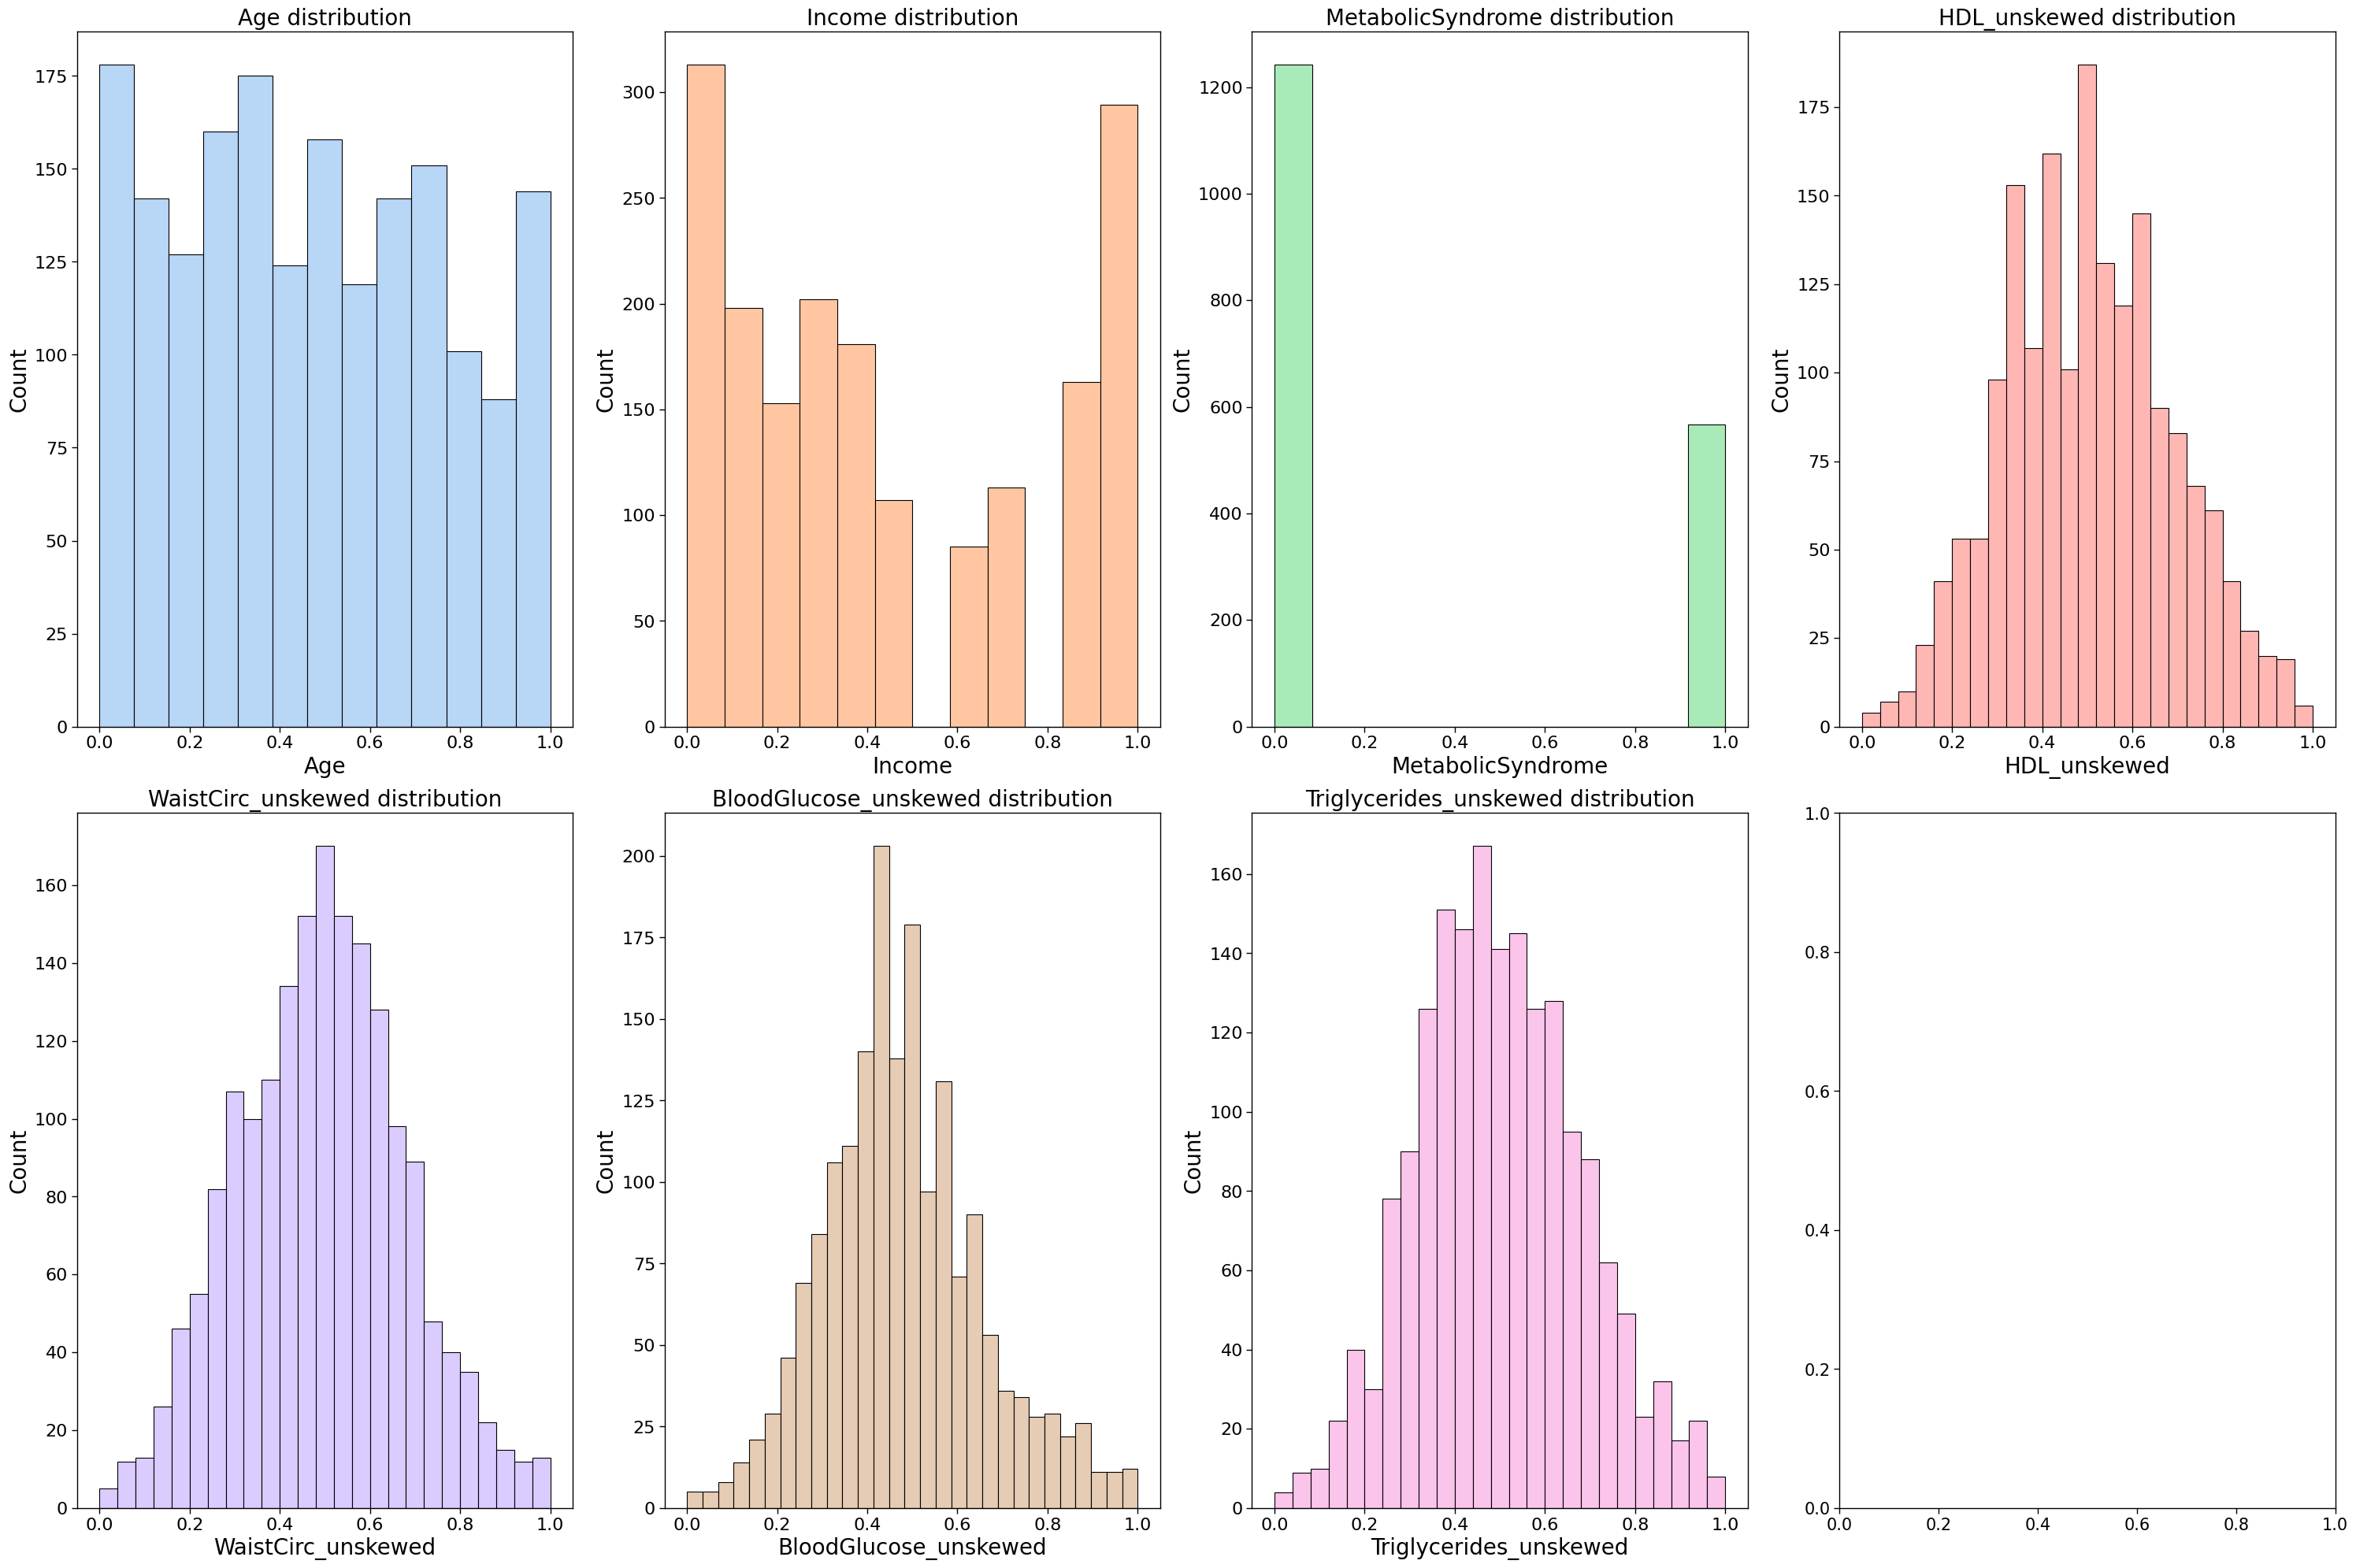

In [57]:
selected_palette = "pastel"
unique_colors = sns.color_palette(selected_palette, n_colors=len(metabolic1.columns))

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30,20))
for index, col in enumerate(metabolic1.columns):
    row_index = index // 4
    col_index = index % 4
    sns.histplot(data=metabolic1, x=col, ax=ax[row_index, col_index], color=unique_colors[index])
    ax[row_index, col_index].set_title(f'{col} distribution', fontsize=20)
    ax[row_index, col_index].set_xlabel(col, fontsize=20)
    ax[row_index, col_index].set_ylabel('Count', fontsize=20)
    ax[row_index, col_index].tick_params(axis='x', labelsize=16)
    ax[row_index, col_index].tick_params(axis='y', labelsize=16)
    
plt.tight_layout()
plt.show()

## 6. Model training

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [60]:
# split dataset into training and testing data
Xm = metabolic1.drop('MetabolicSyndrome', axis=1)
ym = metabolic1['MetabolicSyndrome']
X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size=0.3, random_state=42)
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (1266, 6) (1266,)
Testing set: (543, 6) (543,)


In [62]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [63]:
# create a function to calculate model accuracy metrics
def model_score(y_pred):
    #Check the scores of this model
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred, average='macro') # macro: calculate precision for each class independently and then take the unweighted mean of precision scores. This treats all classes equally, regardless of their size.
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred, average='macro')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred, average='macro')
    print('F1 score: %f' % f1)
    # confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)

In [64]:
# create a function to calculate ROC AUC score
def model_ROC(model):
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print('ROC AUC: %f' % auc)

### 6.1 KNN model

In [65]:
# Fitting classifier to the Training set
knn_model = KNeighborsClassifier(n_neighbors = 11)
model_fit = knn_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = knn_model.predict(X_test)

In [66]:
print(model_score(y_pred_knn))

Accuracy: 0.830571
Precision: 0.833436
Recall: 0.768207
F1 score: 0.788142
[[347  20]
 [ 72 104]]
None


In [67]:
print(model_ROC(knn_model))

ROC AUC: 0.908247
None


In [68]:
# finding the optimal value of k for the model
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_preds = knn_model.predict(X_test)
    print("Accuracy for k =", k, "is:", accuracy_score(y_test, y_preds))
    y_preds2 = knn_model.predict(X_train)
    print(accuracy_score(y_train, y_preds2))

Accuracy for k = 1 is: 0.8268876611418048
1.0
Accuracy for k = 2 is: 0.8029465930018416
0.8846761453396524
Accuracy for k = 3 is: 0.8084714548802947
0.9012638230647709
Accuracy for k = 4 is: 0.8066298342541437
0.872827804107425
Accuracy for k = 5 is: 0.8139963167587477
0.882306477093207
Accuracy for k = 6 is: 0.8158379373848987
0.8641390205371248
Accuracy for k = 7 is: 0.8195211786372008
0.8704581358609794
Accuracy for k = 8 is: 0.8084714548802947
0.8649289099526066
Accuracy for k = 9 is: 0.8195211786372008
0.858609794628752
Accuracy for k = 10 is: 0.8158379373848987
0.8570300157977883
Accuracy for k = 11 is: 0.8305709023941068
0.8593996840442338
Accuracy for k = 12 is: 0.8084714548802947
0.8554502369668247
Accuracy for k = 13 is: 0.8213627992633518
0.8546603475513428
Accuracy for k = 14 is: 0.8176795580110497
0.8499210110584519
Accuracy for k = 15 is: 0.8305709023941068
0.8499210110584519
Accuracy for k = 16 is: 0.8195211786372008
0.8475513428120063
Accuracy for k = 17 is: 0.821362799

<div class="alert alert-block alert-info">
<b></b> With K=11 the model has the accuracy highest so we choose k=11 for the model
</div>

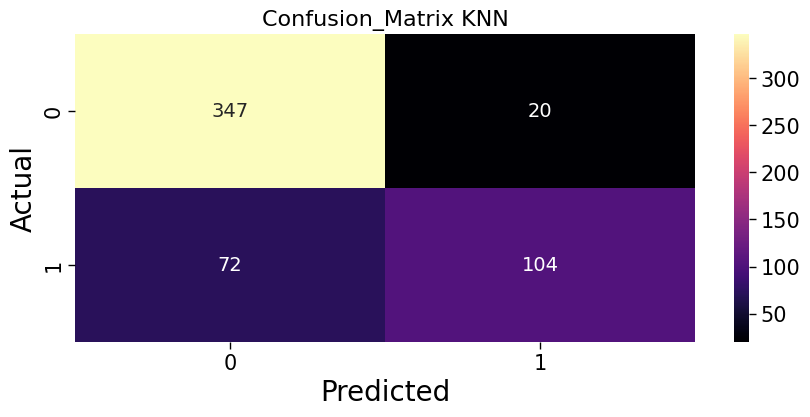

In [69]:
cnf_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,4))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap = "magma", annot_kws={"size": 14})
plt.title('Confusion_Matrix KNN',fontdict={'fontsize': 16})
plt.show()

### 6.2 Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)

In [71]:
print(model_score(y_pred_lr))

Accuracy: 0.837937
Precision: 0.838117
Recall: 0.781049
F1 score: 0.799799
[[346  21]
 [ 67 109]]
None


In [72]:
print(model_ROC(lr_model))

ROC AUC: 0.925765
None


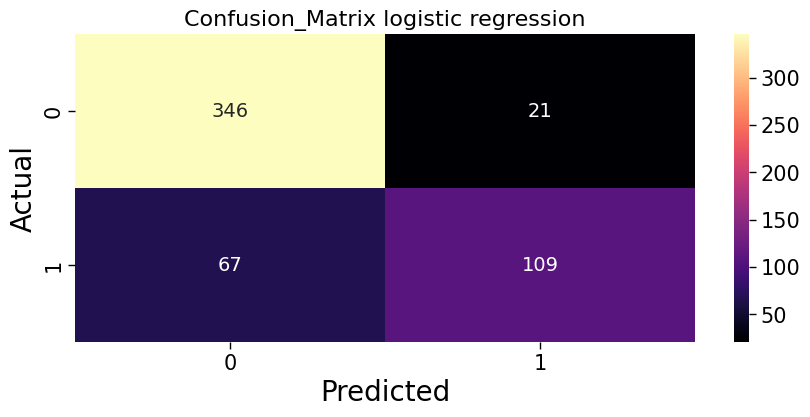

In [73]:
cnf_matrix = pd.crosstab(y_test, y_pred_lr, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,4))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap = "magma", annot_kws={"size": 14})
plt.title('Confusion_Matrix logistic regression',fontdict={'fontsize': 16})
plt.show()

### 6.3 Support Vector Classifier

In [74]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [75]:
print(model_score(y_pred_svc))

Accuracy: 0.843462
Precision: 0.835341
Recall: 0.796964
F1 score: 0.811360
[[341  26]
 [ 59 117]]
None


In [76]:
print(model_ROC(svc_model))

ROC AUC: 0.928598
None


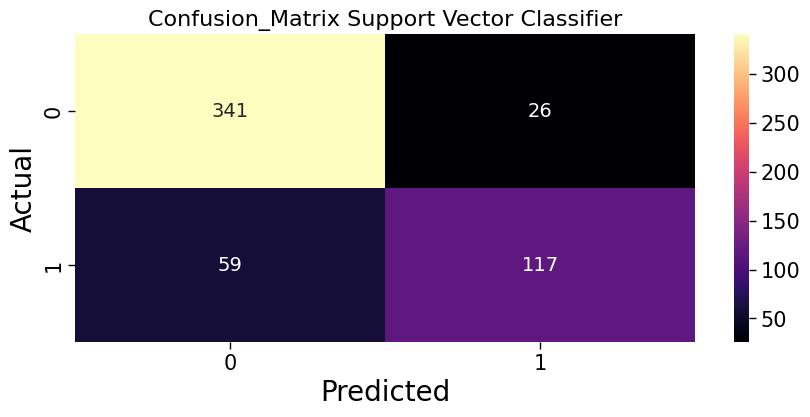

In [77]:
cnf_matrix = pd.crosstab(y_test, y_pred_svc, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,4))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap = "magma", annot_kws={"size": 14})
plt.title('Confusion_Matrix Support Vector Classifier',fontdict={'fontsize': 16})
plt.show()

### 6.4 Decision Tree

In [84]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt_classifier_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the pruned decision tree
dt_classifier_pruned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned = dt_classifier_pruned.predict(X_test)

In [85]:
print(model_score(y_pred_pruned))

Accuracy: 0.902394
Precision: 0.884944
Recall: 0.896744
F1 score: 0.890344
[[335  32]
 [ 21 155]]
None


In [86]:
print(model_ROC(dt_classifier_pruned))

ROC AUC: 0.933529
None


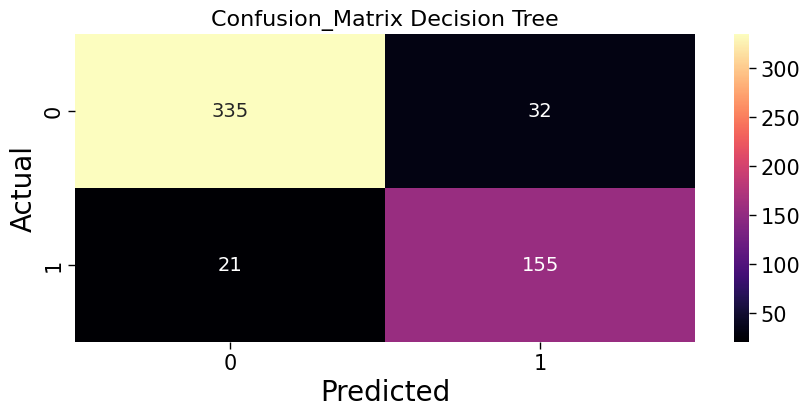

In [87]:
cnf_matrix = pd.crosstab(y_test, y_pred_pruned, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,4))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap = "magma", annot_kws={"size": 14})
plt.title('Confusion_Matrix Decision Tree',fontdict={'fontsize': 16})
plt.show()

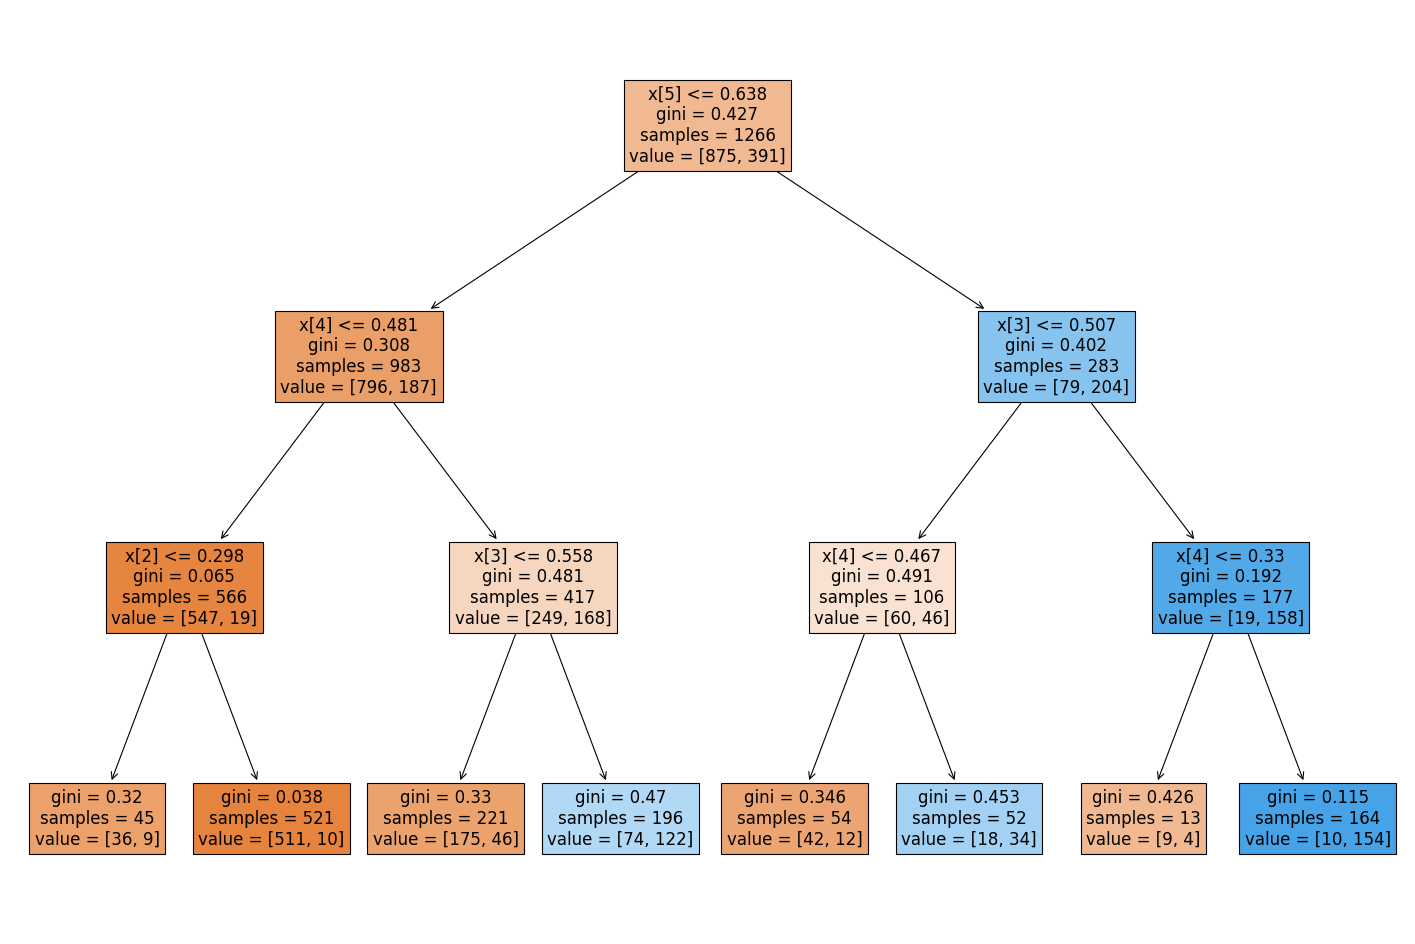

In [89]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(18, 12))
tree.plot_tree(dt_classifier_pruned,
               fontsize=12, filled = True,)
plt.show()
# fig.savefig('imagename.png')

## 7. Model assessment and comparison

In [92]:
names = ["K Nearest_Neighbors","Logistic Regression", "Support Vector Classifier", "Decision Tree", "SVM"]

classifiers = [KNeighborsClassifier(n_neighbors = 11),
               LogisticRegression(),
               SVC(probability=True),
               DecisionTreeClassifier(max_depth = 3)]

In [93]:
model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

In [94]:
# display all the scores of each model

for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    df.loc[index,'Classifiers'] = name
    df.loc[index,'Accuracy'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[index,'Precision'] = precision_score(y_test,clf.predict(X_test),average='macro')
    df.loc[index,'Recall'] = recall_score(y_test,clf.predict(X_test), average='macro')
    df.loc[index,'F1'] = f1_score(y_test,clf.predict(X_test), average='macro')
    df.loc[index,'ROC AUC'] = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    index+=1
    df = df.sort_values(by=['Accuracy'], ascending=False)
    df = df.reset_index(drop=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_764\2155478300.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'K Nearest_Neighbors' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index,'Classifiers'] = name


Classifiers  Accuracy  Precision    Recall        F1  \
0              Decision Tree  0.902394   0.884944  0.896744  0.890344   
1  Support Vector Classifier  0.843462   0.835341  0.796964  0.811360   
2        Logistic Regression  0.837937   0.838117  0.781049  0.799799   
3        K Nearest_Neighbors  0.830571   0.833436  0.768207  0.788142   

    ROC AUC  
0  0.933529  
1  0.928613  
2  0.925765  
3  0.908247

<div class="alert alert-block alert-info">
<b></b> Decision Tree appears to be the best model with highest accuracy and ROC score is also the highest. That means this model can predict the target variable most accurately and it also show the best ability to distinguish 2 classes. 
Choosing Decision Tree for the prediction does make sense in this case when in health diagnosis, ROC is often used, the higher ROC the better. Also, highest recall score implies that this model has the smallest false negative result, which is prefered in healthcare.
</div>

Visualizing the result table

C:\Users\Admin\AppData\Local\Temp\ipykernel_764\1714103451.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classifiers', y = 'Accuracy', data = df, palette=custom_palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_764\1714103451.py:8: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x='Classifiers', y = 'Accuracy', data = df, palette=custom_palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_764\1714103451.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Classifiers', y = 'Precision', data = df, palette=custom_palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_764\1714103451.py:13: UserWarning: The palette list

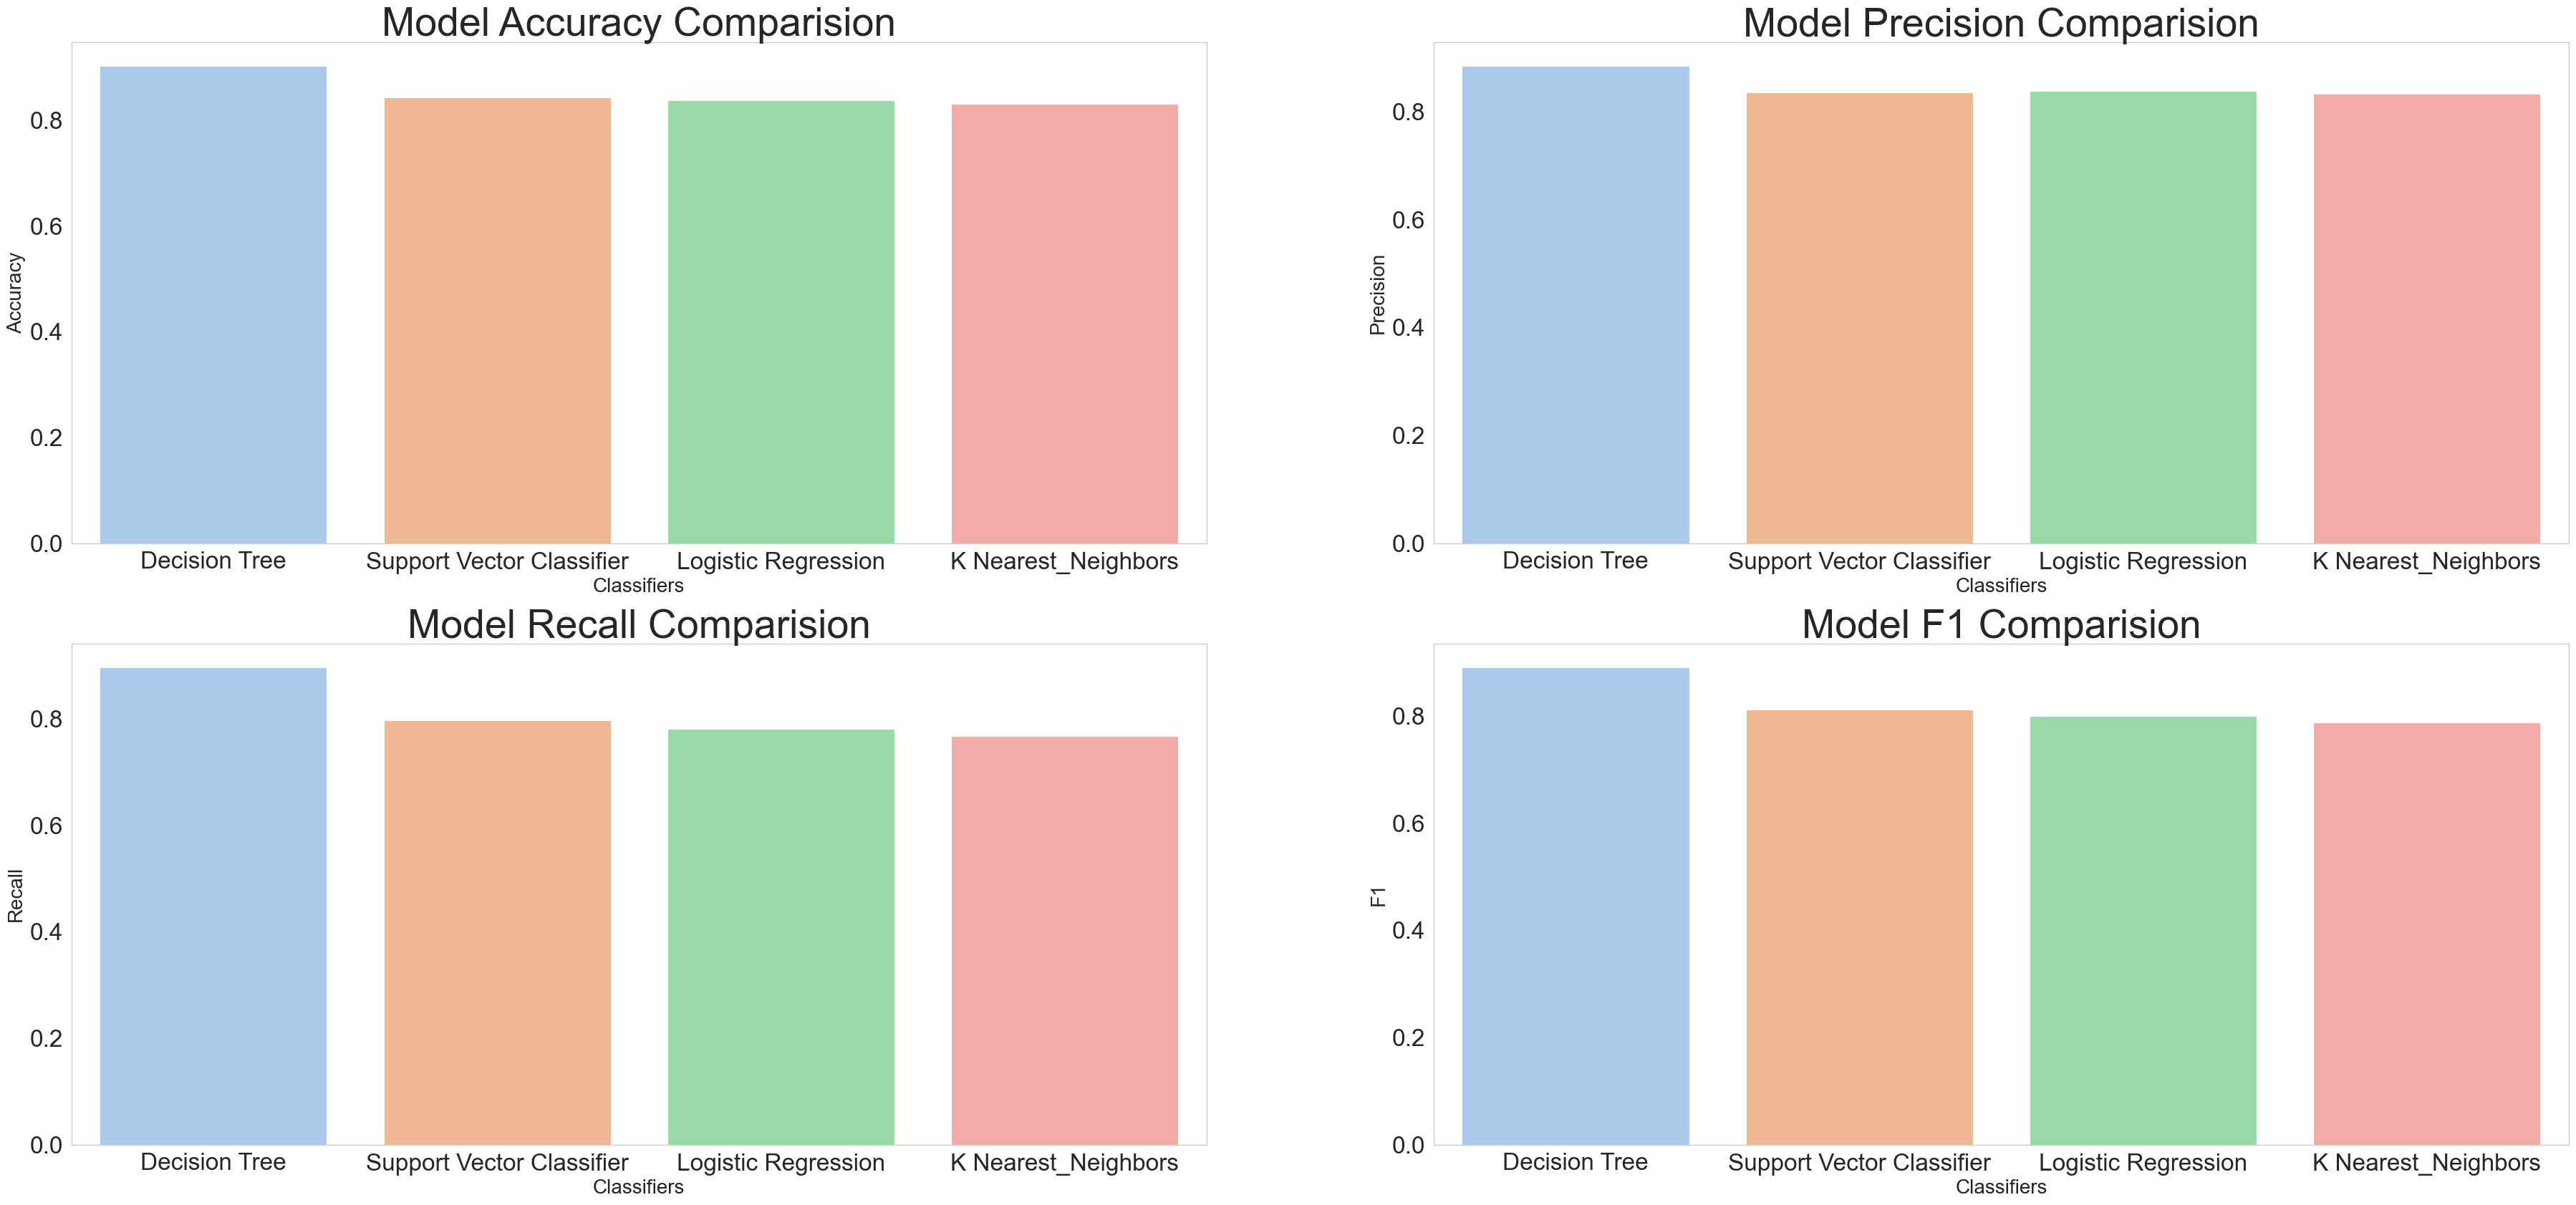

In [95]:
sns.set_style("whitegrid", {'axes.grid' : False})
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(45,20))
#ax = sns.barplot(y="name", x="score", data=df)
plt.subplot(2,2,1)
plt.xticks(size=24)
plt.yticks(size=24)
sns.barplot(x='Classifiers', y = 'Accuracy', data = df, palette=custom_palette) 
plt.title('Model Accuracy Comparision', fontsize=40)
plt.subplot(2,2,2)
plt.xticks(size=24)
plt.yticks(size=24)
sns.barplot(x= 'Classifiers', y = 'Precision', data = df, palette=custom_palette)
plt.title('Model Precision Comparision', fontsize=40)
plt.subplot(2,2,3)
plt.xticks(size=24)
plt.yticks(size=24)
sns.barplot(x= 'Classifiers', y = 'Recall', data = df, palette=custom_palette)
plt.title('Model Recall Comparision', fontsize=40)
plt.subplot(2,2,4)
plt.xticks(size=24)
plt.yticks(size=24)
sns.barplot(x= 'Classifiers', y = 'F1', data = df, palette=custom_palette)
plt.title('Model F1 Comparision', fontsize=40)
plt.show()

Visualizing Receiver Operating Characteristic (ROC) score

In [96]:
# fit model
knn_model.fit(X_train, y_train)
lr_model.fit(X_train,y_train)
svc_model.fit(X_train, y_train)
dt_classifier_pruned.fit(X_train, y_train)

# predict probabilities
pred_prob1 = knn_model.predict_proba(X_test)
pred_prob2 = lr_model.predict_proba(X_test)
pred_prob3 = svc_model.predict_proba(X_test)
pred_prob4 = dt_classifier_pruned.predict_proba(X_test)

from sklearn.metrics import roc_curve# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)# roc curve for tpr = fpr
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)# roc curve for tpr = fpr
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

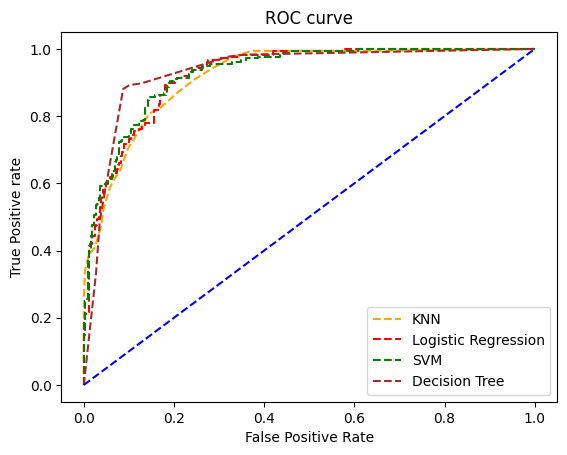

In [97]:
plt.style.use('default')# plot roc curves
plt.grid(False)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label= 'KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label= 'Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label= 'SVM')
plt.plot(fpr4, tpr4, linestyle='--',color='brown', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## 8. Model testing with new data

In [130]:
# create new dataset for testing
model_testing = pd.DataFrame({'Age': [25,30,50,45],
                      'Income': [10000,5000,20000,15000],
                      'HDL': [40,65,70,25],
                      'WaistCirc': [70,90,125,85],
                      'BloodGlucose': [85,100,120,96],
                      'Triglycerides': [94,102,89,75]})

In [131]:
model_testing

Age  Income  HDL  WaistCirc  BloodGlucose  Triglycerides
0   25   10000   40         70            85             94
1   30    5000   65         90           100            102
2   50   20000   70        125           120             89
3   45   15000   25         85            96             75

In [132]:
scaler = MinMaxScaler()
#columns = model_testing['Age', 'Income', 'HDL', 'WaistCirc', 'BloodGlucose','Triglycerides']
model_testing_scaled = scaler.fit_transform(model_testing)

In [133]:
# Calling dataframe constructor
predictions_df = pd.DataFrame() 
# Function call
predictions_testing = dt_classifier_pruned.predict(model_testing_scaled)

d:\1. Business Analytics\Pandas_project\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [134]:
# convert prediction result into a dataframe
prediction_df = pd.DataFrame({'Prediction': predictions_testing})
prediction_df

Prediction
0           0
1           0
2           1
3           0

In [135]:
# combine testing data and result into 1 dataframe
result_df = pd.concat([model_testing, prediction_df], axis=1)
result_df

Age  Income  HDL  WaistCirc  BloodGlucose  Triglycerides  Prediction
0   25   10000   40         70            85             94           0
1   30    5000   65         90           100            102           0
2   50   20000   70        125           120             89           1
3   45   15000   25         85            96             75           0

<div class="alert alert-block alert-info">
<b></b> With new data for testing, Decision Tree predicts 3 out of 4 cases are negative with metabolic syndrome, one case has metabolic.
</div>